## COMP47490 Assignment 1

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,auc
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

## 1. Data Overview:

Load the dataset pulsar_star_19209905.csv which download in BS with 19209905 student number

In [127]:
df = pd.read_csv('pulsar_star_19209905.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,144.625000,47.368073,-0.248391,-0.205495,4.260033,20.594105,7.212481,64.134572,0.0
1,113.812500,37.143251,0.587015,1.823854,1.100334,10.264722,16.463937,347.053768,0.0
2,130.257812,49.040361,0.101426,-0.145024,1.810201,14.178683,11.139956,150.876131,0.0
3,133.242188,49.974016,-0.050664,-0.119966,5.513378,29.774105,5.850068,34.737519,0.0
4,117.648438,48.646780,0.298527,-0.141340,4.166388,24.321802,7.318673,57.736867,0.0


## Task1
Prepare a data quality plan for the dataset. Mark down all the features where there are potential problems or data quality issues. Propose solutions to deal with the problems identified. Explain why you chose one solution over potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data. In particular, pay attention to missing data and carefully address this issue.

In [128]:
# Counts the target class to see is there a unbalanced result or not
df['target_class'].value_counts()

target_class
0.0    9084
1.0     916
Name: count, dtype: int64

In [129]:
# For check what columns in this dataset
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Remove spaces from string columns

In [130]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.str.replace(' ', ''))
df.columns = df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Text(0.5, 1.0, 'Number of samples per pulsar\n in the target')

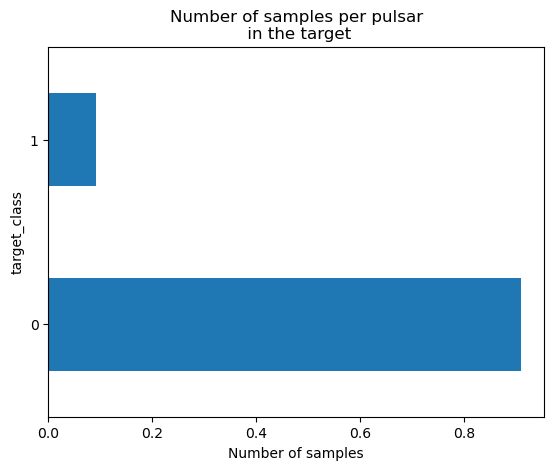

In [206]:
df['target_class'].value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
plt.title("Number of samples per pulsar\n in the target")

## 2. Handling Missing Data:

We copy a original dataset for cleaning the missing value and use mean of each columns value to fullfill the missing value

In [131]:
df_cleaned = df.copy()
df_cleaned.isnull().sum()

Mean of the integrated profile                     0
Standard deviation of the integrated profile       0
Excess kurtosis of the integrated profile       1399
Skewness of the integrated profile                 0
Mean of the DM-SNR curve                           0
Standard deviation of the DM-SNR curve           942
Excess kurtosis of the DM-SNR curve                0
Skewness of the DM-SNR curve                     501
target_class                                       0
dtype: int64

In [228]:
print("Excess kurtosis of the integrated profile ",1399/10000)
print("Standard deviation of the DM-SNR curve ",942/10000)
print("Skewness of the DM-SNR curve",501/10000)

Excess kurtosis of the integrated profile  0.1399
Standard deviation of the DM-SNR curve  0.0942
Skewness of the DM-SNR curve 0.0501


In [132]:
columns_to_visualize = [
    'Excess kurtosis of the integrated profile',
    'Standard deviation of the DM-SNR curve',
    'Skewness of the DM-SNR curve'
]

For the first step, I use Knn imputer and Simpleimputer(strategy='most_frequent')to complete the missing values which appear in  
`Excess kurtosis of the integrated profile`  
`Standard deviation of the DM-SNR curve`  
`Skewness of the DM-SNR curve`

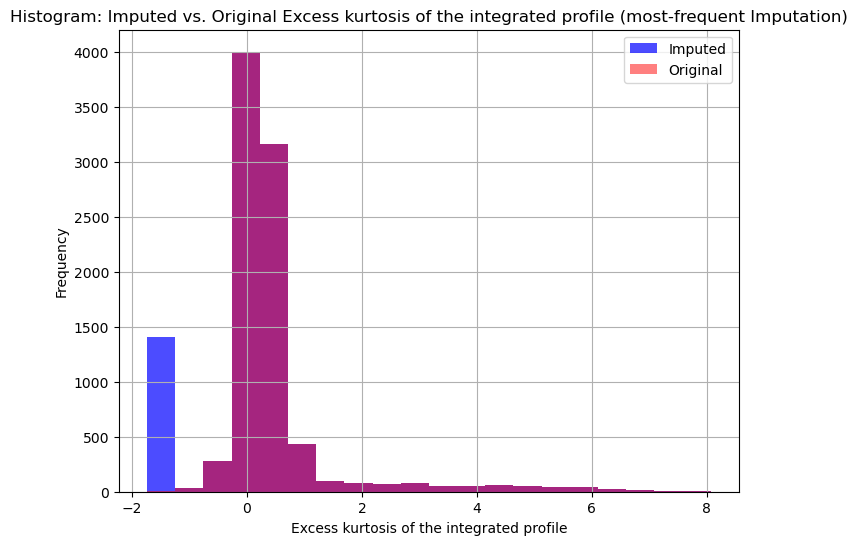

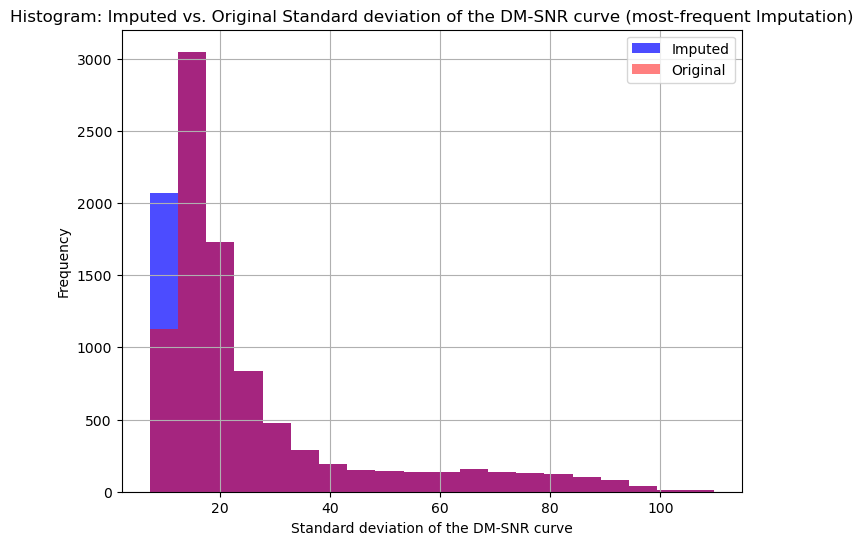

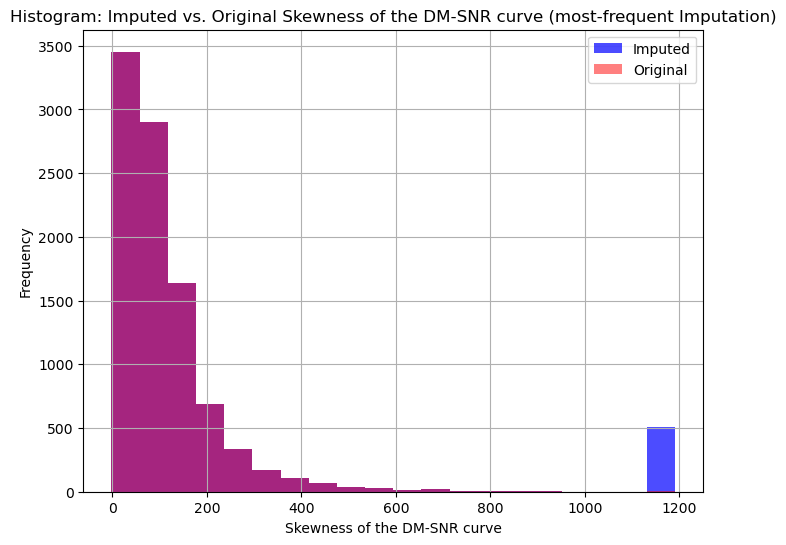

In [133]:
from sklearn.impute import SimpleImputer
df_freq = df_cleaned.copy()
imputer = SimpleImputer(strategy='most_frequent')
df_freq[columns_to_visualize] = imputer.fit_transform(df_freq[columns_to_visualize])
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    plt.hist(df_freq[column].dropna(), bins=20, color='blue', alpha=0.7, label='Imputed')
    plt.hist(df_cleaned[column].dropna(), bins=20, color='red', alpha=0.5, label='Original')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: Imputed vs. Original {column} (most-frequent Imputation)')
    plt.legend()
    plt.grid(True)
    plt.show()

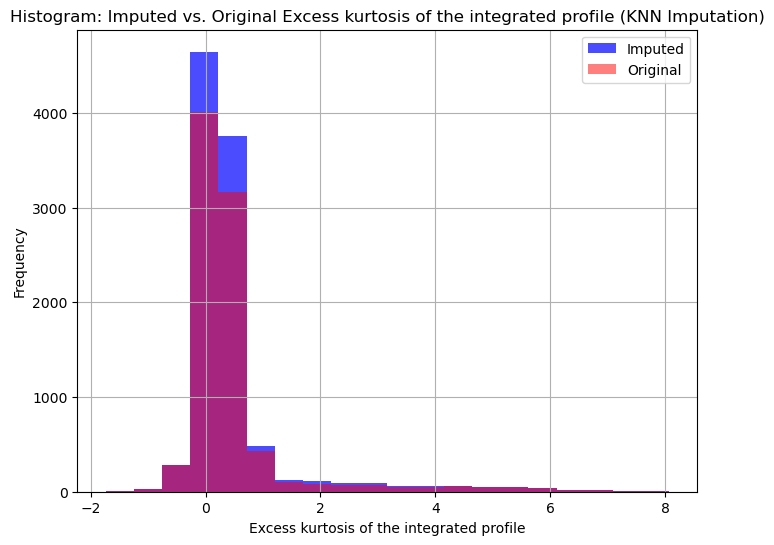

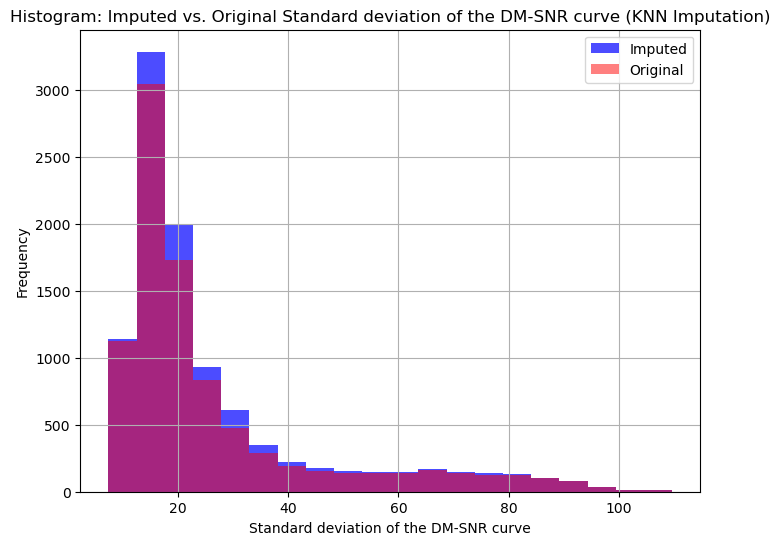

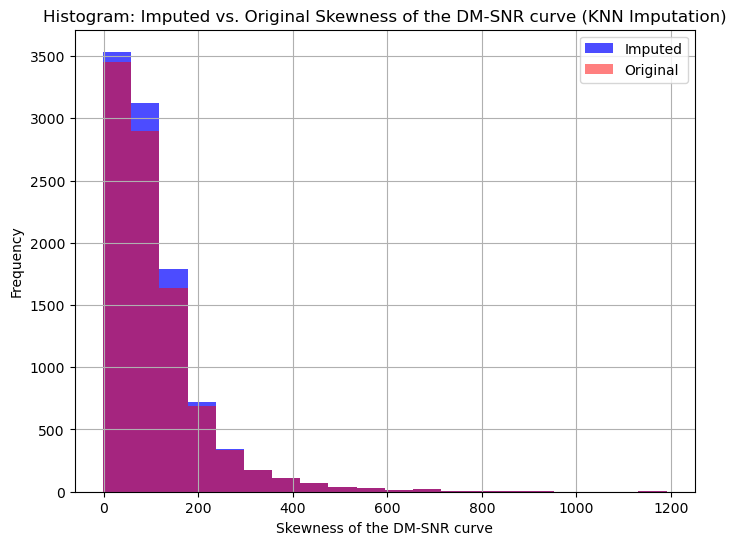

In [134]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
df_knn = df_cleaned.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[columns_to_visualize] = imputer.fit_transform(df[columns_to_visualize])
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    plt.hist(df_knn[column].dropna(), bins=20, color='blue', alpha=0.7, label='Imputed')
    plt.hist(df_cleaned[column].dropna(), bins=20, color='red', alpha=0.5, label='Original')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: Imputed vs. Original {column} (KNN Imputation)')
    plt.legend()
    plt.grid(True)
    plt.show()


After compare two methods, simpleimputer with most frequent and Knn imputation. The Histograms shows that Knn imputation is much better than most frequent one. So I decide to use Knn imputation here and use it for the next step .

In [135]:
# Create a new dataframe called df_cleaned and we check is there still have a missing value
df_cleaned = df_knn.copy()
df_cleaned.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

## 3. Outliers:

First we remove duplicates from df_cleaned, but it looks like no any duplicates in this dataset.

In [136]:
df_cleaned.duplicated().sum()

0

We create a columns list with no target_class

In [137]:
columns_nt= ['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']

Then, I create QQ plots, which will help me assess how closely the distribution of each variable matches a theoretical normal distribution.

<Figure size 800x600 with 0 Axes>

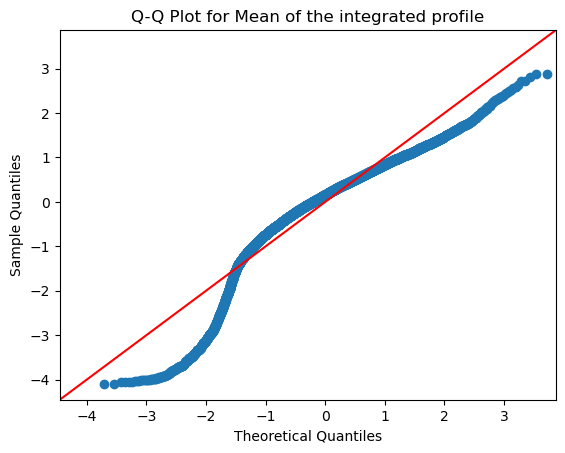

<Figure size 800x600 with 0 Axes>

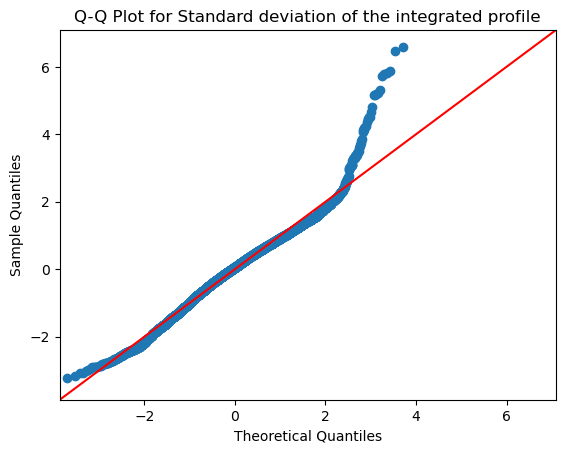

<Figure size 800x600 with 0 Axes>

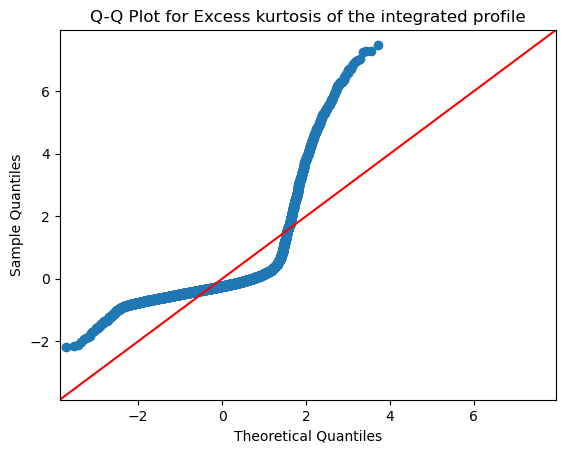

<Figure size 800x600 with 0 Axes>

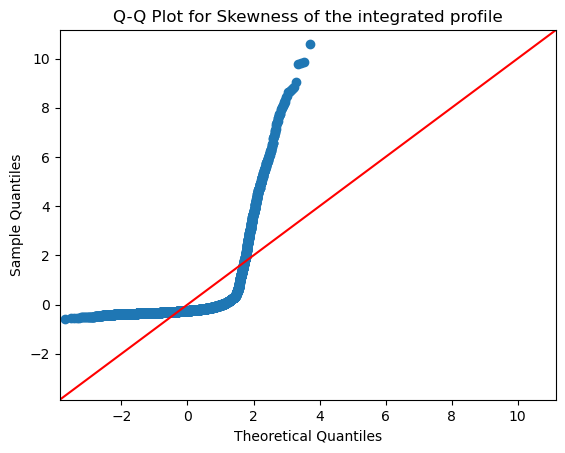

<Figure size 800x600 with 0 Axes>

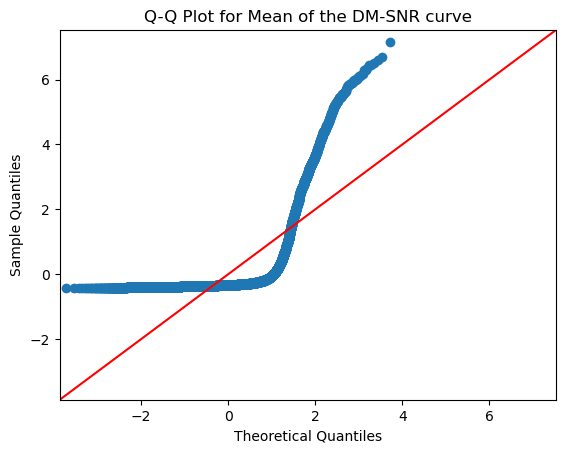

<Figure size 800x600 with 0 Axes>

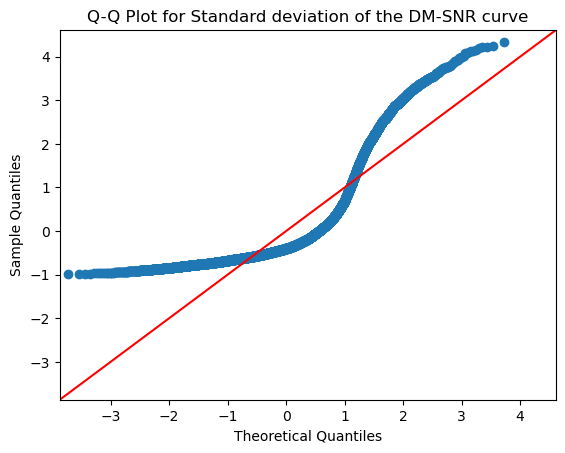

<Figure size 800x600 with 0 Axes>

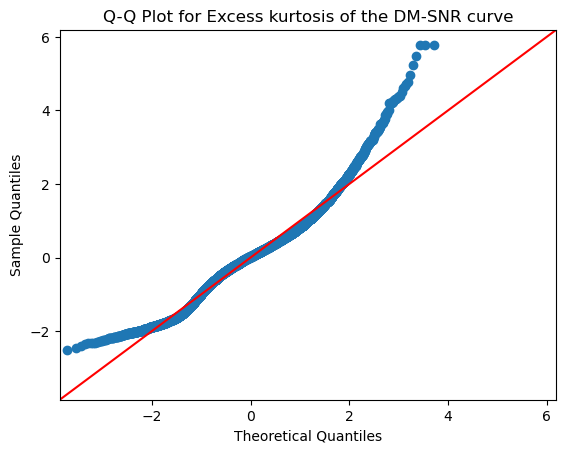

<Figure size 800x600 with 0 Axes>

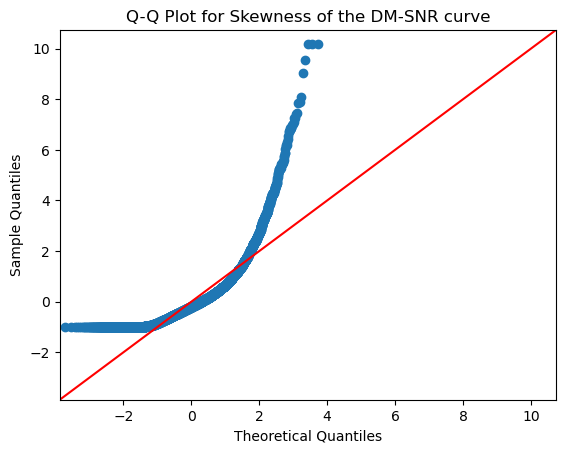

In [138]:
import statsmodels.api as sm
import scipy.stats as stats
# Create a Q-Q plot for the dataset
for col in columns_nt:
    plt.figure(figsize=(8, 6))
    sm.qqplot(df_cleaned[col], fit=True, line='45')
    plt.title(f'Q-Q Plot for {col}')
    plt.show()

The QQ-plots shows the relationship for each column are not very good for this dataset

Histograms shows the distribution of each column's values.

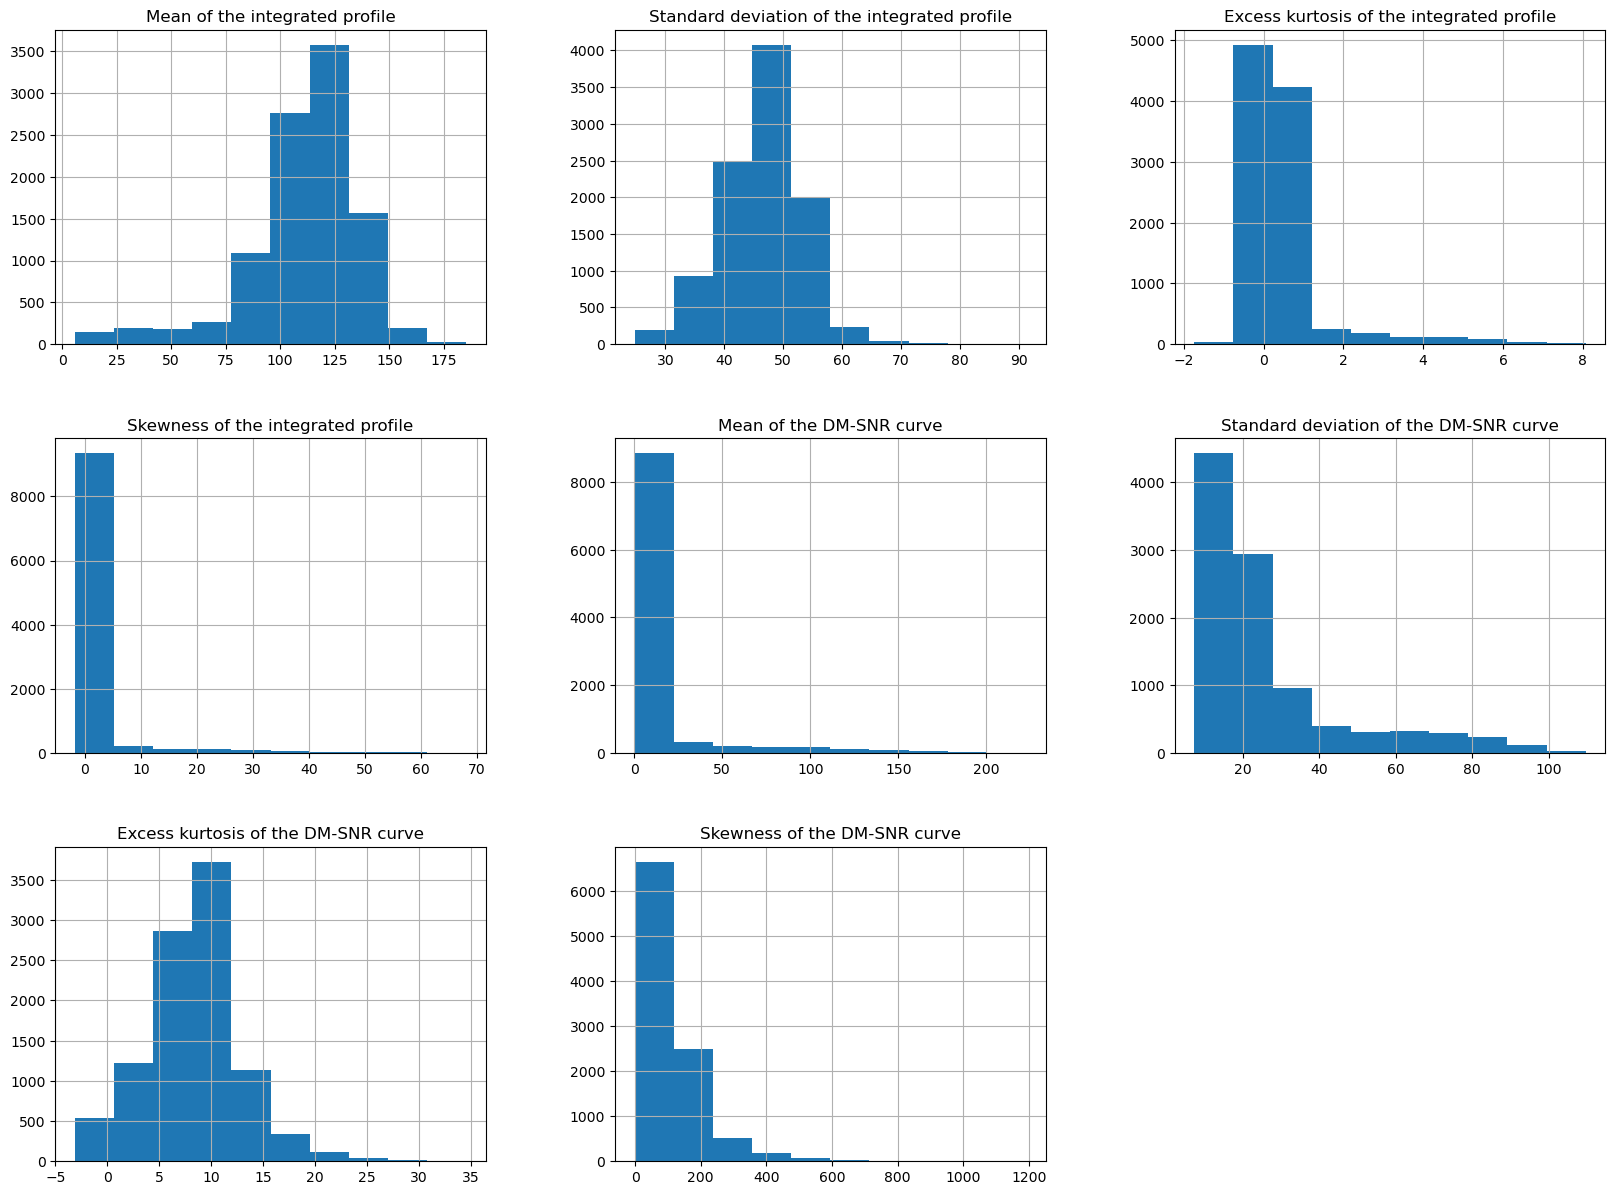

In [139]:
df_cleaned[columns_nt].hist(figsize=(20,20), layout=(4,3))
plt.grid(which='major',linestyle='-')

The histograms are not in normal distribution in most columns.

Then boxplot to see the outliers and then we decide how to handle them.

Mean of the integrated profile                     Axes(0.125,0.712609;0.227941x0.167391)
Standard deviation of the integrated profile    Axes(0.398529,0.712609;0.227941x0.167391)
Excess kurtosis of the integrated profile       Axes(0.672059,0.712609;0.227941x0.167391)
Skewness of the integrated profile                 Axes(0.125,0.511739;0.227941x0.167391)
Mean of the DM-SNR curve                        Axes(0.398529,0.511739;0.227941x0.167391)
Standard deviation of the DM-SNR curve          Axes(0.672059,0.511739;0.227941x0.167391)
Excess kurtosis of the DM-SNR curve                 Axes(0.125,0.31087;0.227941x0.167391)
Skewness of the DM-SNR curve                     Axes(0.398529,0.31087;0.227941x0.167391)
dtype: object

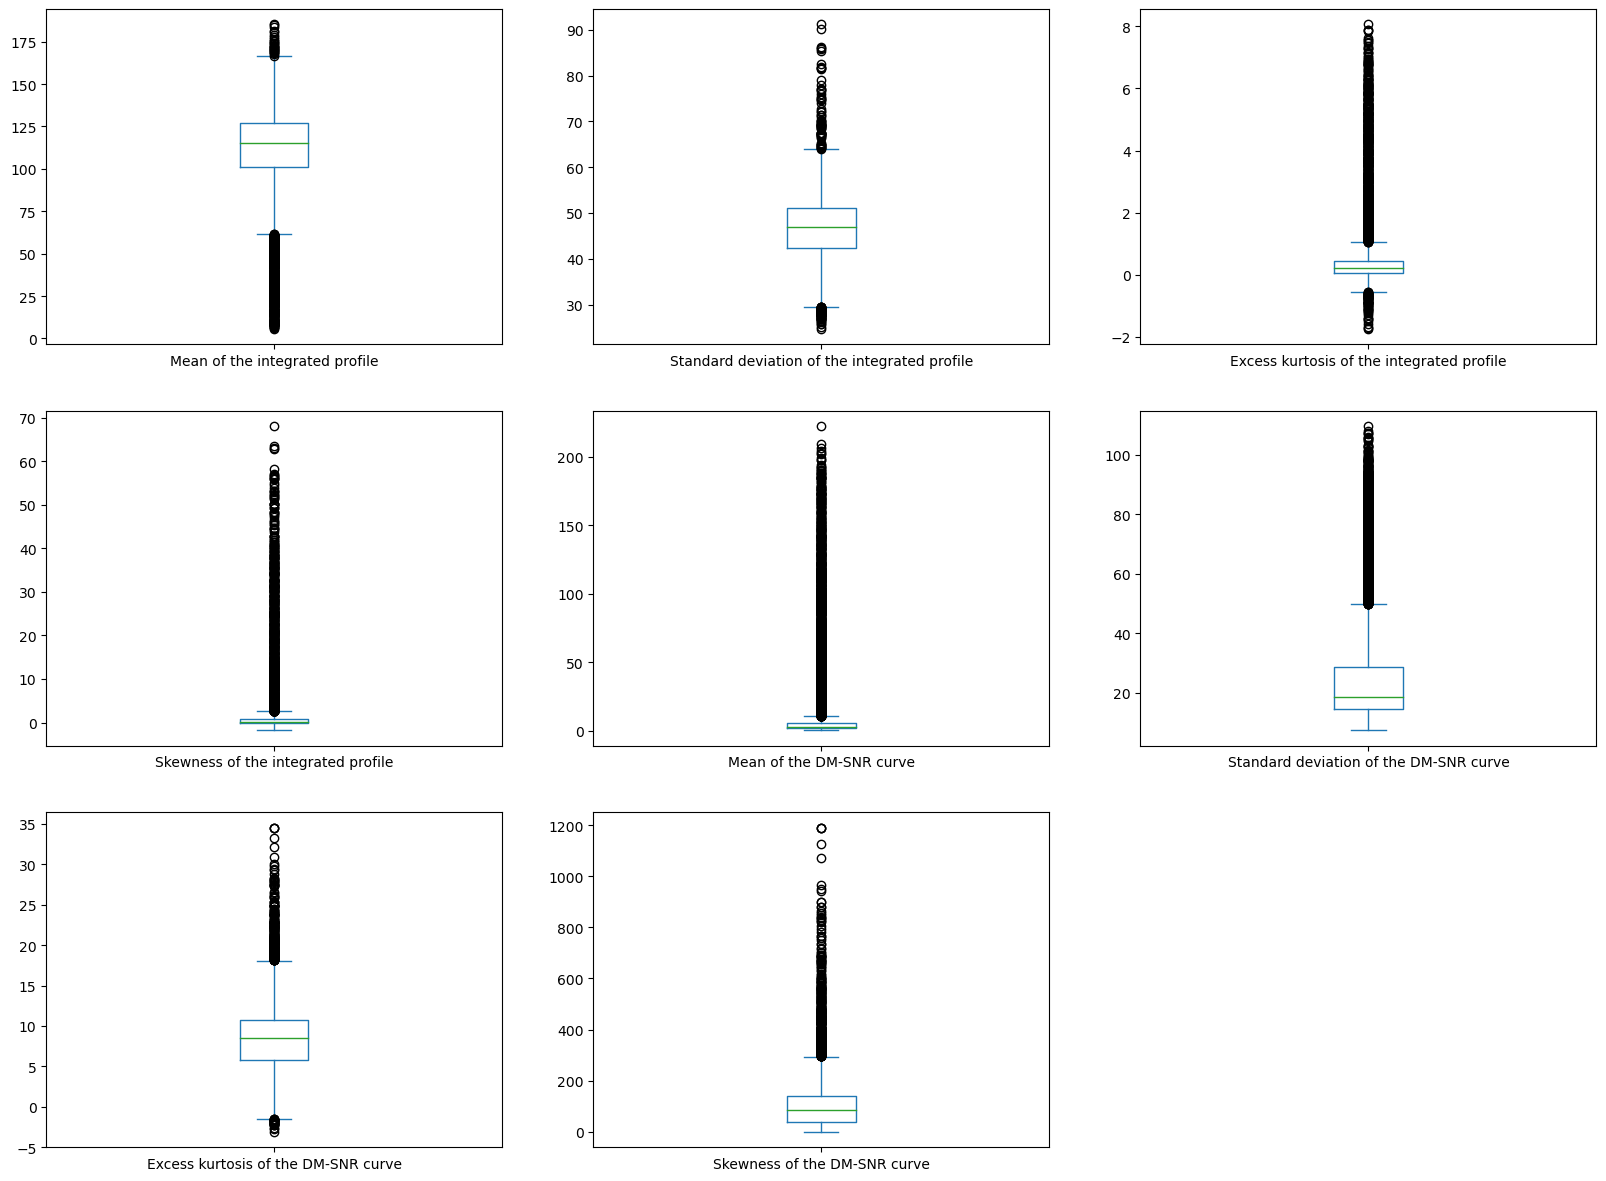

In [140]:
df_cleaned[columns_nt].plot(kind='box', subplots=True, figsize=(20,20), layout=(4, 3), sharex=False, sharey=False)

After to observe these boxplot, you can find a lot of outliers in this datasets. Then the first step to handle it is find all outliers.

In [216]:
def find_outliers(df, columns=None):
    if columns is None:
        columns = df.columns
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])
    return outliers

In [217]:
find_outliers(df_cleaned)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
29,175.523438,52.564390,-1.444555,1.948663,169.731605,81.281186,-0.865514,-0.657968,0.0
48,168.703125,49.806243,-0.738803,0.510047,209.300167,61.946757,-2.157756,3.997383,0.0
58,9.679688,34.186742,5.675514,34.091988,121.699833,43.778700,0.667757,0.631393,1.0
59,32.625000,30.070230,6.007010,40.501465,27.678094,60.526032,2.345499,4.566228,1.0
80,32.132812,28.104262,5.262150,35.735721,33.775084,62.581161,1.934401,2.708355,1.0
...,...,...,...,...,...,...,...,...,...
9952,52.609375,44.636069,2.831534,8.356597,16.202341,46.564077,3.089334,8.901839,1.0
9953,75.726562,43.685437,1.801754,4.555957,10.127926,51.653263,4.295453,17.419902,1.0
9962,16.875000,37.974292,3.990852,21.782514,117.642140,48.985928,0.877832,0.607237,1.0
9969,11.820312,37.258270,5.340502,28.655975,146.725752,75.399449,-0.290785,-1.219307,1.0


After consideration for this dataset, I decide not handle the outliers because outliers in astronomical data can sometimes represent rare, yet scientifically interesting phenomena. Removing them might result in valuable information loss.

    
| Features                         | Data Quality Issue                | Handling Strategy                |
|-------------------------|----------------------      |------------------------   |
Mean of the Integrated Profile (float64)  |Outliers | Keep as it|
Standard Deviation of the Integrated Profile (float64)   | Outliers | Keep as it |     
Excess Kurtosis of the Integrated Profile  (float64)     | Missing Values(13.9%) and Outliers |I use Knn imputation method to fill the missing values |
Skewness of the Integrated Profile (float64)             | Outliers | Keep as it | 
Mean of the DM-SNRcurve (float64)  | Outliers | Keep as it |   
Standard Deviation of the DM-SNR curve (float64)            | Missing Values(9.42%) and Outliers | I use Knn imputation method to fill the missing values |
Excess kurtosis of the DM-SNR curve (float64)         | Outliers | Keep as it |
Skewness of the DM-SNR curve (float64)         | Missing Values(5.01%) and Outliers | I use Knn imputation method to fill the missing values |   
target_class (int64)                  | imbalanced | Keep as it |

## 4. Data Types and Data Encoding:

In [144]:
df_cleaned.dtypes

Mean of the integrated profile                  float64
Standard deviation of the integrated profile    float64
Excess kurtosis of the integrated profile       float64
Skewness of the integrated profile              float64
Mean of the DM-SNR curve                        float64
Standard deviation of the DM-SNR curve          float64
Excess kurtosis of the DM-SNR curve             float64
Skewness of the DM-SNR curve                    float64
target_class                                    float64
dtype: object

For target_class, Due to it only has 0 and 1 value, We can set it into integer.(And also we can set it into bool to TRUE OR FALSE)

In [225]:
df_cleaned['target_class'] = df.target_class.astype('int')
#df[target_class = df.target_class.astype('bool')

## Task 2: 
Normalize or standardize your features as necessary. Carefully decide the normalization or standardization technique used.

After observe the histogram and QQ plot, This dataset is more suitable to do with normalization, which works well when data doesn't follow a normal distribution or have outliers. We use Min-Max normalize method here.

In [146]:
df_T2 = df_cleaned.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
df_T2[df_cleaned.columns] = scaler.fit_transform(df_cleaned)
df_T2

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.773564,0.340125,0.151886,0.022697,0.018212,0.129283,0.274734,0.055395,0.0
1,0.601855,0.186217,0.237066,0.051732,0.003992,0.028296,0.520267,0.292555,0.0
2,0.693500,0.365297,0.187554,0.023562,0.007187,0.066562,0.378969,0.128107,0.0
3,0.710131,0.379351,0.172047,0.023921,0.023852,0.219032,0.238576,0.030753,0.0
4,0.623231,0.359373,0.207651,0.023615,0.017790,0.165727,0.277553,0.050032,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.611999,0.447156,0.187474,0.018462,0.014938,0.127811,0.293477,0.063232,0.0
9996,0.377770,0.189920,0.378925,0.126885,0.025508,0.223367,0.236149,0.027186,1.0
9997,0.682833,0.249032,0.187158,0.037575,0.029523,0.243392,0.215692,0.022547,0.0
9998,0.929252,0.285110,0.083206,0.045145,0.432155,0.952292,0.094581,0.000276,0.0


In [147]:
df_T2['target_class'].value_counts()

target_class
0.0    9084
1.0     916
Name: count, dtype: int64

## Task 3:
Carefully decide the evaluation measure that is best suited to this application and the dataset. Justify your choice -- What characteristics of the application and the dataset made you decide the evaluation measure you chose.


I set two dataframe first, X is withoud target_class, y is only with column target_class.

In [148]:
df_T3 = (df_T2.copy()).drop(columns=['target_class'])
df_T3T = df_T2['target_class']

Then I split the data into training and testing sets

In [149]:
X_train, X_test, y_train, y_test = train_test_split(df_T3,df_T3T,random_state=1, test_size=0.2)

Now we choose `Random Forest` classfier here.

In [150]:
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [151]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
bal_accuracy = balanced_accuracy_score(y_test, y_pred)

I use those measures to identify and compare each classifier method good or not. Balance accuracy here due to this imbalanced target_class result.

Accuracy: 0.9780
Precision: 0.9419
Recall: 0.8066
F1-Score: 0.8690
ROC AUC: 0.9008
bal_accuracy: 0.9008


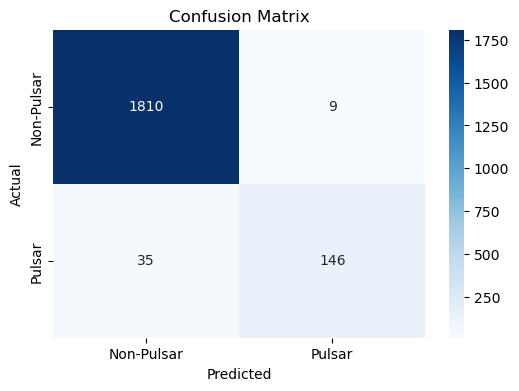

In [152]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'bal_accuracy: {bal_accuracy:.4f}')
class_labels = ["Non-Pulsar", "Pulsar"]
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Due to imbalanced datasets, I use StratifiedKFold instead of Kfold to make sure that each fold contains a representative sample of the different classes.

In [153]:
stratified_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [154]:
balanced_accuracy_scores = []
for train_index, test_index in stratified_kf.split(df_T3, df_T3T):
    X_train, X_test = df_T3.iloc[train_index], df_T3.iloc[test_index]
    y_train, y_test = df_T3T.iloc[train_index], df_T3T.iloc[test_index]
    
    cv_results = cross_validate(classifier, X_train[columns_nt], y_train, cv=stratified_kf, scoring='balanced_accuracy')
    balanced_accuracy_score = cv_results['test_score'].mean()
    balanced_accuracy_scores.append(balanced_accuracy_score)

mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
std_balanced_accuracy = np.std(balanced_accuracy_scores)
print("Balanced Accuracy Scores in 10 folds:", balanced_accuracy_scores)
print(f"Mean Balanced Accuracy: {mean_balanced_accuracy:.2f}")
print(f"Standard Deviation: {std_balanced_accuracy:.2f}")

Balanced Accuracy Scores in 10 folds: [0.9059072152830965, 0.9037276070364543, 0.9101108058651395, 0.9103462428893522, 0.908040588873711, 0.9018224581874241, 0.9031377736137435, 0.9079642475491291, 0.9053776443786438, 0.9053904723703162]
Mean Balanced Accuracy: 0.91
Standard Deviation: 0.00


## Task 4:
Compare a decision tree classifier, a kNN classifier and four SVM classifiers (one each with “linear”, “poly”, “rbf” and “sigmoid” kernel) based on the evaluation measure selected in Task 3. Carefully decide the evaluation methodology for this comparison (e.g., cross validation or a single train/validation/test split or other alternatives). Explore the effect of different parameter settings on these classifiers and find the winner classifier/ parameter setting. Why do you think you got those comparison results? Are you surprised at the relative performance of “linear”, “rbf” and “sigmoid” kernels?

In [155]:
from sklearn.metrics import balanced_accuracy_score

In this Task we do 6 different classifiers to compare the measures we chose in last task.

In [156]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train[columns_nt],y_train)
y_pred_D = Dtree.predict(X_test[columns_nt])
accuracy_D = accuracy_score(y_test, y_pred_D)
print(f"Accuracy: {accuracy_D:.4f}")
precision_D = precision_score(y_test, y_pred_D)
print(f"Precision: {precision_D:.4f}")
recall_D = recall_score(y_test, y_pred_D)
print(f"Recall: {recall_D:.4f}")
f1_D = f1_score(y_test, y_pred_D)
print(f"F1-Score: {f1_D:.4f}")
roc_auc_D = roc_auc_score(y_test, y_pred_D)
print(f'ROC AUC: {roc_auc_D:.4f}')
bal_accuracy_D = balanced_accuracy_score(y_test, y_pred_D)
print(f"Balanced Accuracy: {bal_accuracy_D:.3f}")


Accuracy: 0.9680
Precision: 0.8333
Recall: 0.8152
F1-Score: 0.8242
ROC AUC: 0.8993
Balanced Accuracy: 0.899


In [157]:
Knn = KNeighborsClassifier()
Knn.fit(X_train[columns_nt],y_train)
y_pred_K = Knn.predict(X_test[columns_nt])
accuracy_K = accuracy_score(y_test, y_pred_K)
print(f"Accuracy: {accuracy_K:.4f}")
precision_K = precision_score(y_test, y_pred_K)
print(f"Precision: {precision_K:.4f}")
recall_K = recall_score(y_test, y_pred_K)
print(f"Recall: {recall_K:.4f}")
f1_K = f1_score(y_test, y_pred_K)
print(f"F1-Score: {f1_K:.4f}")
roc_auc_K = roc_auc_score(y_test, y_pred_K)
print(f'ROC AUC: {roc_auc_K:.4f}')
bal_accuracy_K = balanced_accuracy_score(y_test, y_pred_K)
print(f'bal_accuracy: {bal_accuracy_K:.4f}')

Accuracy: 0.9790
Precision: 0.9383
Recall: 0.8261
F1-Score: 0.8786
ROC AUC: 0.9103
bal_accuracy: 0.9103


In [158]:
svc = SVC(kernel='linear')
svc.fit(X_train[columns_nt], y_train)
y_pred1 = svc.predict(X_test[columns_nt])
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.4f}")
precision1 = precision_score(y_test, y_pred1)
print(f"Precision: {precision1:.4f}")
recall1 = recall_score(y_test, y_pred1)
print(f"Recall: {recall1:.4f}")
f11 = f1_score(y_test, y_pred1)
print(f"F1-Score: {f11:.4f}")
roc_auc1 = roc_auc_score(y_test, y_pred1)
print(f'ROC AUC: {roc_auc1:.4f}')
bal_accuracy1 = balanced_accuracy_score(y_test, y_pred1)
print(f'bal_accuracy: {bal_accuracy1:.4f}')

Accuracy: 0.9770
Precision: 0.9600
Recall: 0.7826
F1-Score: 0.8623
ROC AUC: 0.8897
bal_accuracy: 0.8897


In [159]:
svc = SVC(kernel='rbf')
svc.fit(X_train[columns_nt], y_train)
y_pred2 = svc.predict(X_test[columns_nt])
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2:.4f}")
precision2 = precision_score(y_test, y_pred2)
print(f"Precision: {precision2:.4f}")
recall2 = recall_score(y_test, y_pred2)
print(f"Recall: {recall2:.4f}")
f12 = f1_score(y_test, y_pred2)
print(f"F1-Score: {f12:.4f}")
roc_auc2 = roc_auc_score(y_test, y_pred2)
print(f'ROC AUC: {roc_auc2:.4f}')
bal_accuracy2 = balanced_accuracy_score(y_test, y_pred2)
print(f'bal_accuracy: {bal_accuracy2:.4f}')

Accuracy: 0.9810
Precision: 0.9740
Recall: 0.8152
F1-Score: 0.8876
ROC AUC: 0.9065
bal_accuracy: 0.9065


In [160]:
svc = SVC(kernel='poly',degree = 3) # default value of parameter degree = 3
svc.fit(X_train[columns_nt], y_train)
y_pred3 = svc.predict(X_test[columns_nt])
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.4f}")
precision3 = precision_score(y_test, y_pred3)
print(f"Precision: {precision3:.4f}")
recall3 = recall_score(y_test, y_pred3)
print(f"Recall: {recall3:.4f}")
f13 = f1_score(y_test, y_pred3)
print(f"F1-Score: {f13:.4f}")
roc_auc3 = roc_auc_score(y_test, y_pred3)
print(f'ROC AUC: {roc_auc3:.4f}')
bal_accuracy3 = balanced_accuracy_score(y_test, y_pred3)
print(f'bal_accuracy: {bal_accuracy3:.4f}')

Accuracy: 0.9820
Precision: 0.9625
Recall: 0.8370
F1-Score: 0.8953
ROC AUC: 0.9168
bal_accuracy: 0.9168


In [161]:
svc = SVC(kernel='poly',degree = 2) # value of parameter degree = 2
svc.fit(X_train[columns_nt], y_train)
y_pred_d2 = svc.predict(X_test[columns_nt])
accuracy_d2 = accuracy_score(y_test, y_pred_d2)
print(f"Accuracy: {accuracy_d2:.4f}")
precision_d2 = precision_score(y_test, y_pred_d2)
print(f"Precision: {precision_d2:.4f}")
recall_d2 = recall_score(y_test, y_pred_d2)
print(f"Recall: {recall_d2:.4f}")
f1_d2 = f1_score(y_test, y_pred_d2)
print(f"F1-Score: {f1_d2:.4f}")
roc_auc_d2 = roc_auc_score(y_test, y_pred_d2)
print(f'ROC AUC: {roc_auc_d2:.4f}')
bal_accuracy_d2 = balanced_accuracy_score(y_test, y_pred_d2)
print(f'bal_accuracy: {bal_accuracy_d2:.4f}')

Accuracy: 0.9810
Precision: 0.9740
Recall: 0.8152
F1-Score: 0.8876
ROC AUC: 0.9065
bal_accuracy: 0.9065


In [162]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train[columns_nt], y_train)
y_pred4 = svc.predict(X_test[columns_nt])
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4:.4f}")
precision4 = precision_score(y_test, y_pred4)
print(f"Precision: {precision4:.4f}")
recall4 = recall_score(y_test, y_pred4)
print(f"Recall: {recall4:.4f}")
f14 = f1_score(y_test, y_pred4)
print(f"F1-Score: {f14:.4f}")
roc_auc4 = roc_auc_score(y_test, y_pred4)
print(f'ROC AUC: {roc_auc4:.4f}')
bal_accuracy4 = balanced_accuracy_score(y_test, y_pred4)
print(f'bal_accuracy: {bal_accuracy4:.4f}')

Accuracy: 0.9000
Precision: 0.4608
Recall: 0.5109
F1-Score: 0.4845
ROC AUC: 0.7251
bal_accuracy: 0.7251


Then we load all records into data frame

In [163]:
T4_result1 = [accuracy_D,precision_D,recall_D,f1_D,roc_auc_D,bal_accuracy_D]
T4_result2 = [accuracy_K,precision_K,recall_K,f1_K,roc_auc_K,bal_accuracy_K]
T4_result3 = [accuracy1,precision1,recall1,f11,roc_auc1,bal_accuracy1]
T4_result4 = [accuracy2,precision2,recall2,f12,roc_auc2,bal_accuracy2]
T4_result5 = [accuracy3, precision3, recall3, f13, roc_auc3, bal_accuracy3]
T4_result6 = [accuracy4, precision4, recall4, f14, roc_auc4, bal_accuracy4]
T4_result7 = [accuracy_d2,precision_d2,recall_d2,f1_d2,roc_auc_d2,bal_accuracy_d2]
results = [T4_result1, T4_result2, T4_result3, T4_result4, T4_result5, T4_result6,T4_result7]
column_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "Balanced Accuracy"]
results_T4 = pd.DataFrame(results, columns=column_names)
method_names = ["DecisionTree", "K-NN", "SVM (Linear)", "SVM (RBF)", "SVM (Poly)", "SVM (Sigmoid)","SVM (Poly,degree=2)"]
results_T4.index = method_names
results_T4


,Accuracy,Precision,Recall,F1-Score,ROC AUC,Balanced Accuracy
DecisionTree,0.968,0.833333,0.815217,0.824176,0.899349,0.899349
K-NN,0.979,0.938272,0.826087,0.878613,0.910290,0.910290
SVM (Linear),0.977,0.960000,0.782609,0.862275,0.889652,0.889652
SVM (RBF),0.981,0.974026,0.815217,0.887574,0.906507,0.906507
SVM (Poly),0.982,0.962500,0.836957,0.895349,0.916826,0.916826
SVM (Sigmoid),0.900,0.460784,0.510870,0.484536,0.725148,0.725148
"SVM (Poly,degree=2)",0.981,0.974026,0.815217,0.887574,0.906507,0.906507


Then we use cross-validation to compare the score with different classfiers.

In [164]:
classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("k-NN", KNeighborsClassifier()),
    ("SVM (Linear)", SVC(kernel='linear')),
    ("SVM (RBF)", SVC(kernel='rbf')),
    ("SVM (Poly)", SVC(kernel='poly')),
    ("SVM (Sigmoid)", SVC(kernel='sigmoid'))
]
# I use make_scorer for create a custom scoring function for evaluation metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1-Score': make_scorer(f1_score),
    'ROC AUC': make_scorer(roc_auc_score),
    'Balanced Accuracy': make_scorer(balanced_accuracy_score)
}
# set K-fold here and k with 5
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [165]:
results = []
for clf_name, classifier in classifiers:
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(classifier, df_T3, df_T3T, cv=stratified_kf, scoring=scorer)
        mean_score = scores.mean()
        std_score = scores.std()
        results.append({
            'Classifier': clf_name,
            'Metric': metric_name,
            'Mean Score': mean_score,
            'Standard Deviation': std_score
        })
results_df = pd.DataFrame(results)
pivot_df = results_df.pivot(index='Classifier', columns='Metric', values='Mean Score')
pivot_df


Metric,Accuracy,Balanced Accuracy,F1-Score,Precision,ROC AUC,Recall
Classifier,,,,,,
Decision Tree,0.9650,0.897948,0.804178,0.800093,0.895758,0.815473
SVM (Linear),0.9740,0.877716,0.842562,0.945634,0.877716,0.759836
SVM (Poly),0.9769,0.891583,0.861845,0.952336,0.891583,0.787129
SVM (RBF),0.9759,0.888084,0.855714,0.946934,0.888084,0.780571
SVM (Sigmoid),0.9011,0.713440,0.472029,0.461165,0.713440,0.483684
k-NN,0.9754,0.898131,0.856794,0.917890,0.898131,0.803528


In [166]:
# then we set the metric for plot to compare
plot = ["Accuracy", "Balanced Accuracy", "F1-Score", "Precision", "ROC AUC", "Recall"]

Heatmap for compare each score

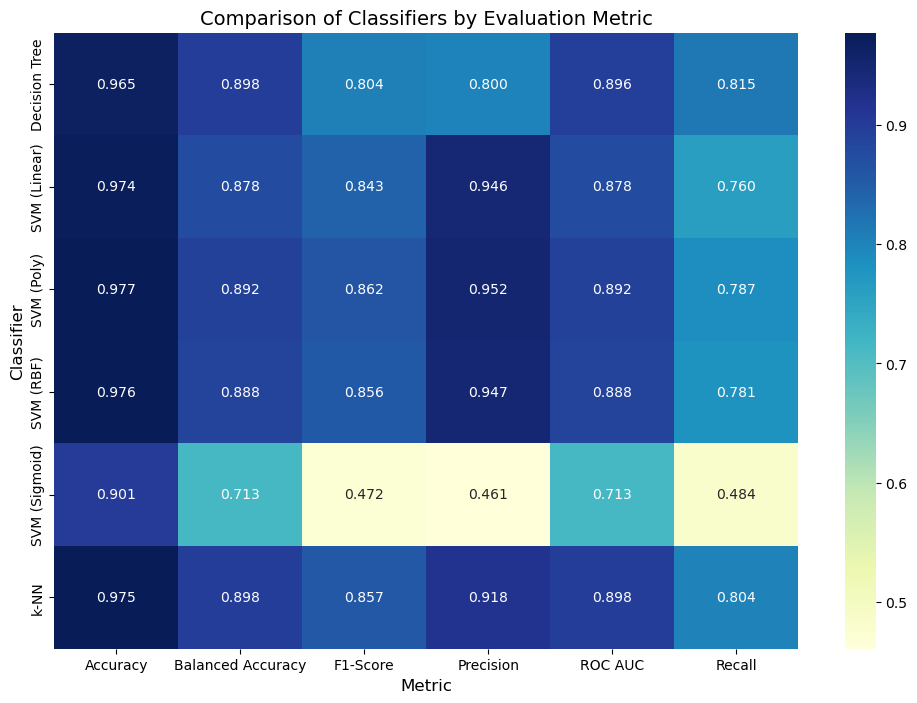

In [167]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df[plot], annot=True, cmap="YlGnBu", fmt=".3f")
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Classifier", fontsize=12)
plt.title("Comparison of Classifiers by Evaluation Metric", fontsize=14)
plt.show()


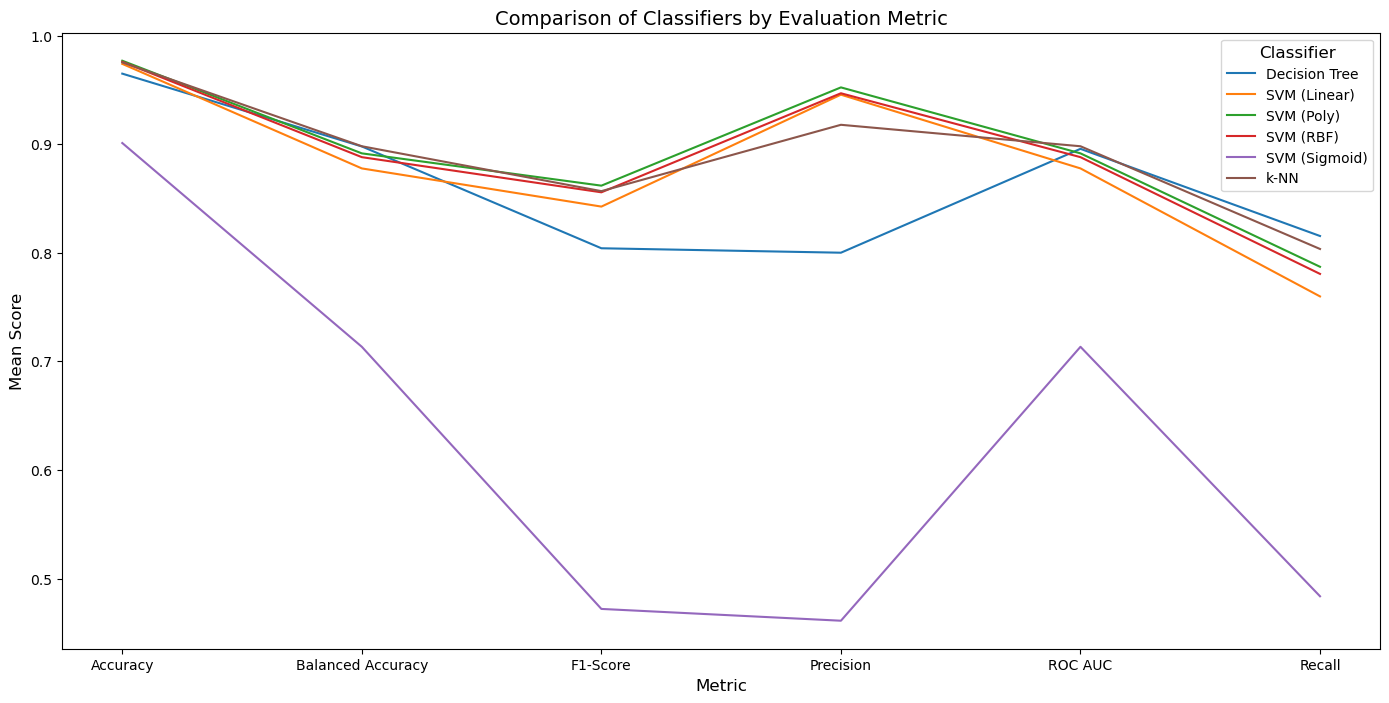

In [168]:
pivot_df[plot].T.plot(figsize=(17, 8), fontsize=10)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.title("Comparison of Classifiers by Evaluation Metric", fontsize=14)
plt.legend(title="Classifier", title_fontsize=12)
plt.show()


/Users/jerryzzr/opt/anaconda3/envs/comp47490/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/jerryzzr/opt/anaconda3/envs/comp47490/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


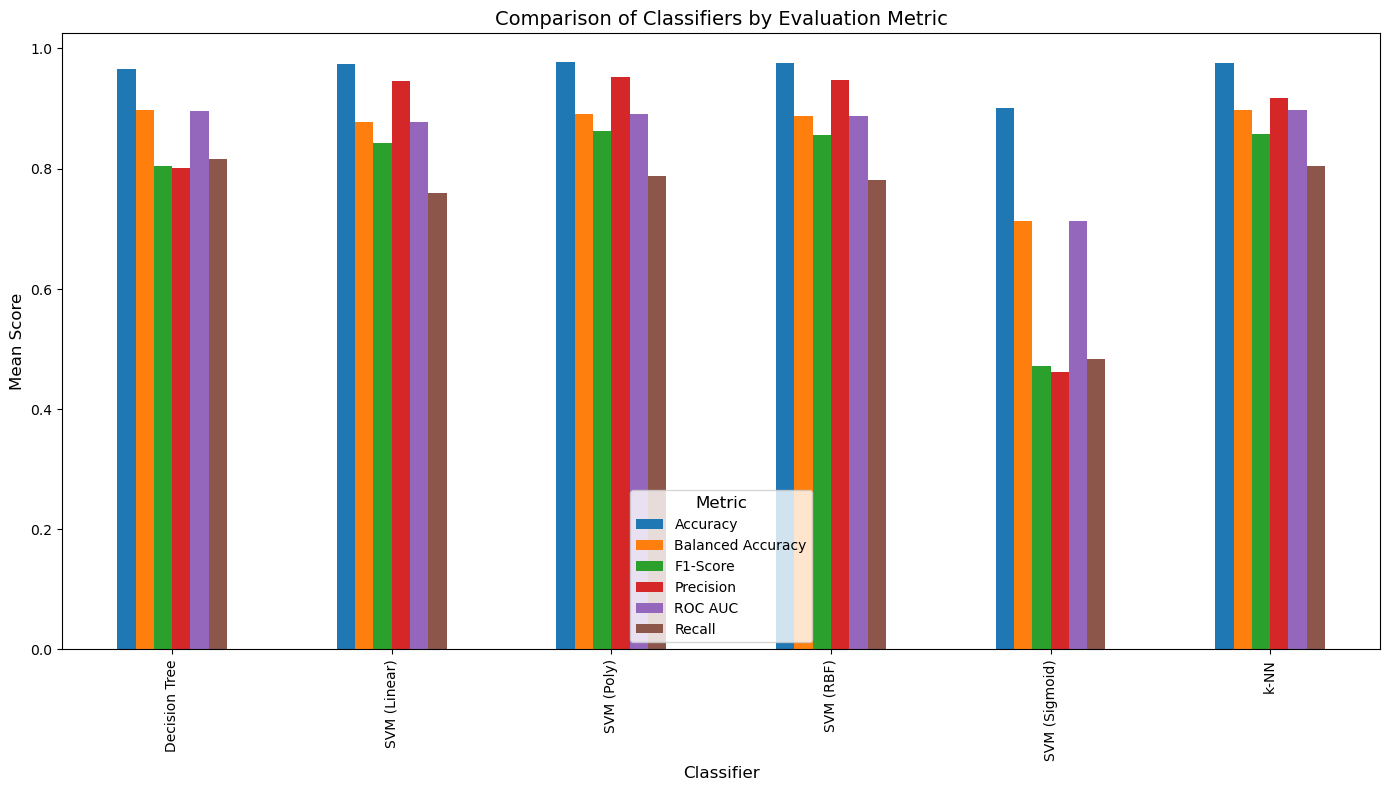

In [169]:
pivot_df[plot].plot(kind='bar', yerr=pivot_df[plot].std(), capsize=5, figsize=(17, 8), fontsize=10)
plt.xlabel("Classifier", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.title("Comparison of Classifiers by Evaluation Metric", fontsize=14)
plt.legend(title="Metric", title_fontsize=12)

# Show the plot
plt.show()

after comparision from those tables and plots, SVM('poly') and SVM('rbf) are better than the other classifiers. The SVM('sigmoid') is the worst one. And cross-validation will not help improve its performance here.

## Task5:
Based on a filter technique, identify the three most discriminative features and the three least discriminative features in this dataset. Run the SVM classifiers with the four kernels on the top three and the bottom three features. How do the results compare?

In [170]:
# First we use Mutual information to measure the amount of dependency between two random variables, X_train[columns_nt] is already transformed before
i_scores = mutual_info_classif(X_train[columns_nt], y_train)

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores, index = X_train[columns_nt].columns, columns =['I-Gain'])
features_info_gain.sort_values(by=['I-Gain'], ascending=False, inplace=True)
features_info_gain

,I-Gain
Excess kurtosis of the integrated profile,0.197884
Skewness of the integrated profile,0.194789
Mean of the integrated profile,0.193826
Standard deviation of the DM-SNR curve,0.123173
Skewness of the DM-SNR curve,0.118506
Mean of the DM-SNR curve,0.115952
Excess kurtosis of the DM-SNR curve,0.106627
Standard deviation of the integrated profile,0.085562


## Top 3 features:
`Excess kurtosis of the integrated profile`  
`Skewness of the integrated profile`  
`Mean of the integrated profile`

In [171]:
# Select top and bottom features based on mutual information
top3_features_train = X_train[features_info_gain.index[:3]]
bottom3_features_train = X_train[features_info_gain.index[-3:]]

top3_features_test = X_test[features_info_gain.index[:3]]
bottom3_features_test = X_test[features_info_gain.index[-3:]]


In [172]:
classifier_T5 = [
    ("SVM (Linear)", SVC(kernel='linear')),
    ("SVM (RBF)", SVC(kernel='rbf')),
    ("SVM (Poly)", SVC(kernel='poly')),
    ("SVM (Sigmoid)", SVC(kernel='sigmoid'))
]

In [173]:
## Train and evaluate the classifiers with top3 features
top3_feature_scores = {}
for clf_name, classifier in classifier_T5:
    classifier.fit(top3_features_train, y_train)
    y_pred = classifier.predict(top3_features_test)
    accuracy = accuracy_score(y_test, y_pred)
    top3_feature_scores[clf_name] = accuracy
print("Accuracy Scores with Top 3 Features:")
for clf_name, accuracy in top3_feature_scores.items():
    print(f"{clf_name}: {accuracy:.4f}")

Accuracy Scores with Top 3 Features:
SVM (Linear): 0.9730
SVM (RBF): 0.9740
SVM (Poly): 0.9730
SVM (Sigmoid): 0.9380


In [174]:
# Train and evaluate the classifiers with bottom3 features
bottom3_feature_scores = {}
for clf_name, classifier in classifier_T5:
    classifier.fit(bottom3_features_train, y_train)
    y_pred = classifier.predict(bottom3_features_test)
    accuracy = accuracy_score(y_test, y_pred)
    bottom3_feature_scores[clf_name] = accuracy
print("\nAccuracy Scores with Bottom 3 Features:")
for clf_name, accuracy in bottom3_feature_scores.items():
    print(f"{clf_name}: {accuracy:.4f}")


Accuracy Scores with Bottom 3 Features:
SVM (Linear): 0.9620
SVM (RBF): 0.9640
SVM (Poly): 0.9570
SVM (Sigmoid): 0.8500


In this task, We compare 4 kernals SVM classifiers accuracy scores with Top3 and Bottom3 features. After comparision in this task, I fould that SVM(RBF) which works great in both top3 or bottom3 accuracy scores.

## Task6: 
Carefully identify the most discriminating features to predict the binary outcome of the dataset using one wrapper feature selection technique. This should be done for each of the decision tree, kNN and four SVM classifiers from part Task 4. Report and discuss the differences between the feature subsets produced by the filter (Task 5) and the wrapper technique. 

In [175]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Load the numerical column into dataframe, which helps me to identify features.

In [176]:
column_index = pd.DataFrame(columns_nt)
column_index

,0
0,Mean of the integrated profile
1,Standard deviation of the integrated profile
2,Excess kurtosis of the integrated profile
3,Skewness of the integrated profile
4,Mean of the DM-SNR curve
5,Standard deviation of the DM-SNR curve
6,Excess kurtosis of the DM-SNR curve
7,Skewness of the DM-SNR curve


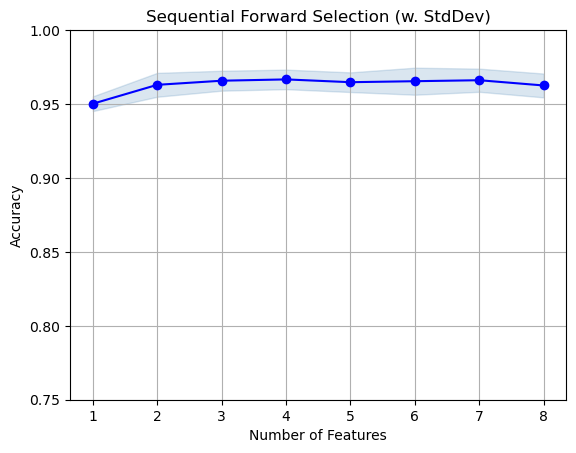

('Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Standard deviation of the DM-SNR curve')


In [177]:
DT = DecisionTreeClassifier(random_state=5)
sfs_forward1 = SFS(DT, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward1 = sfs_forward1.fit(X_train[columns_nt], y_train)
sfs_forward1.k_score_
fig1 = plot_sfs(sfs_forward1.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward1.k_feature_names_)

In [178]:
pd.DataFrame.from_dict(sfs_forward1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.9533333333333334, 0.9477777777777778, 0.94,...",0.950222,"(Excess kurtosis of the integrated profile,)",0.003705,0.004989,0.001663
2,"(2, 3)","[0.9666666666666667, 0.9644444444444444, 0.947...",0.963,"(Excess kurtosis of the integrated profile, Sk...",0.005997,0.008074,0.002691
3,"(2, 3, 5)","[0.9733333333333334, 0.9666666666666667, 0.947...",0.965778,"(Excess kurtosis of the integrated profile, Sk...",0.005003,0.006737,0.002246
4,"(1, 2, 3, 5)","[0.9677777777777777, 0.9755555555555555, 0.948...",0.966667,"(Standard deviation of the integrated profile,...",0.00491,0.006611,0.002204
5,"(1, 2, 3, 5, 6)","[0.9633333333333334, 0.9744444444444444, 0.948...",0.964778,"(Standard deviation of the integrated profile,...",0.004938,0.006649,0.002216
6,"(1, 2, 3, 4, 5, 6)","[0.9677777777777777, 0.9722222222222222, 0.94,...",0.965444,"(Standard deviation of the integrated profile,...",0.00679,0.009142,0.003047
7,"(1, 2, 3, 4, 5, 6, 7)","[0.9666666666666667, 0.9766666666666667, 0.946...",0.966111,"(Standard deviation of the integrated profile,...",0.005815,0.007829,0.00261
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9666666666666667, 0.9733333333333334, 0.944...",0.962556,"(Mean of the integrated profile, Standard devi...",0.005986,0.008059,0.002686


after compare the avg_score in dataframe, the highest score include 4 features, They are (1,2,3,5).

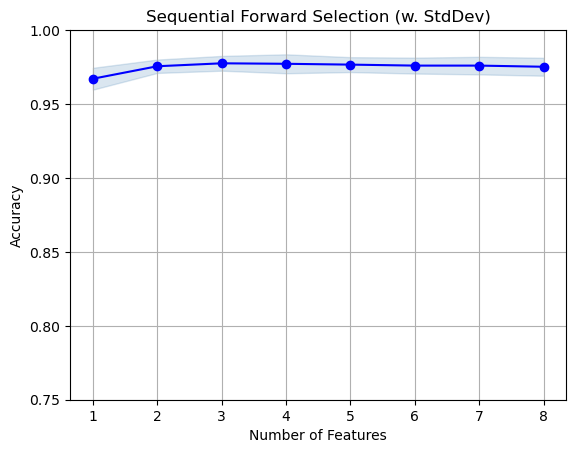

('Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Skewness of the integrated profile')


In [179]:
Knn = KNeighborsClassifier()
sfs_forward2 = SFS(Knn, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward2 = sfs_forward2.fit(X_train[columns_nt], y_train)
sfs_forward2.k_score_
fig1 = plot_sfs(sfs_forward2.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward2.k_feature_names_)

In [180]:
pd.DataFrame.from_dict(sfs_forward2.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9644444444444444, 0.9711111111111111, 0.952...",0.967111,"(Skewness of the integrated profile,)",0.005489,0.00739,0.002463
2,"(1, 3)","[0.9722222222222222, 0.98, 0.9633333333333334,...",0.975556,"(Standard deviation of the integrated profile,...",0.003362,0.004527,0.001509
3,"(0, 1, 3)","[0.9766666666666667, 0.9777777777777777, 0.964...",0.977556,"(Mean of the integrated profile, Standard devi...",0.003705,0.004989,0.001663
4,"(0, 1, 2, 3)","[0.9711111111111111, 0.9788888888888889, 0.962...",0.977222,"(Mean of the integrated profile, Standard devi...",0.004759,0.006407,0.002136
5,"(0, 1, 2, 3, 7)","[0.9733333333333334, 0.9811111111111112, 0.963...",0.976667,"(Mean of the integrated profile, Standard devi...",0.003746,0.005043,0.001681
6,"(0, 1, 2, 3, 6, 7)","[0.9766666666666667, 0.9766666666666667, 0.962...",0.976,"(Mean of the integrated profile, Standard devi...",0.003995,0.005379,0.001793
7,"(0, 1, 2, 3, 5, 6, 7)","[0.9777777777777777, 0.9766666666666667, 0.96,...",0.976,"(Mean of the integrated profile, Standard devi...",0.004416,0.005946,0.001982
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9755555555555555, 0.9766666666666667, 0.96,...",0.975222,"(Mean of the integrated profile, Standard devi...",0.004506,0.006067,0.002022


after compare the avg_score in dataframe, the highest score include 3 features, They are (0,1,3).

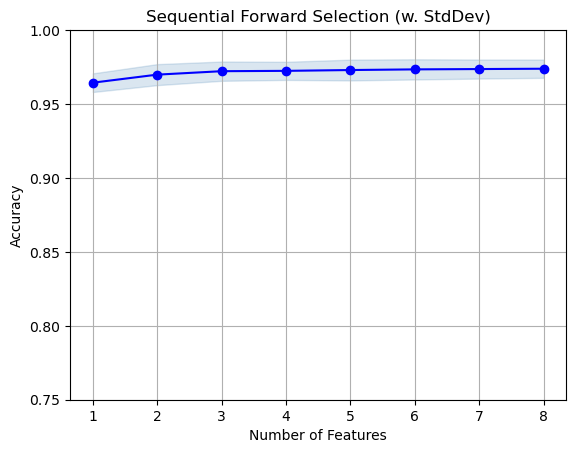

('Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [181]:
SVM1 = SVC(kernel='linear')
sfs_forward3 = SFS(SVM1, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward3 = sfs_forward3.fit(X_train[columns_nt], y_train)
sfs_forward3.k_score_
fig1 = plot_sfs(sfs_forward3.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward3.k_feature_names_)

In [182]:
pd.DataFrame.from_dict(sfs_forward3.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.9588888888888889, 0.9666666666666667, 0.951...",0.964444,"(Mean of the integrated profile,)",0.004683,0.006305,0.002102
2,"(0, 6)","[0.9666666666666667, 0.97, 0.9544444444444444,...",0.969889,"(Mean of the integrated profile, Excess kurtos...",0.005277,0.007105,0.002368
3,"(0, 2, 6)","[0.9722222222222222, 0.9777777777777777, 0.955...",0.972222,"(Mean of the integrated profile, Excess kurtos...",0.00484,0.006517,0.002172
4,"(0, 2, 4, 6)","[0.9722222222222222, 0.9777777777777777, 0.956...",0.972444,"(Mean of the integrated profile, Excess kurtos...",0.004547,0.006122,0.002041
5,"(0, 2, 3, 4, 6)","[0.9688888888888889, 0.9777777777777777, 0.956...",0.973,"(Mean of the integrated profile, Excess kurtos...",0.00522,0.007028,0.002343
6,"(0, 1, 2, 3, 4, 6)","[0.9711111111111111, 0.9766666666666667, 0.956...",0.973444,"(Mean of the integrated profile, Standard devi...",0.005066,0.006821,0.002274
7,"(0, 1, 2, 3, 4, 5, 6)","[0.9722222222222222, 0.9766666666666667, 0.957...",0.973667,"(Mean of the integrated profile, Standard devi...",0.004784,0.006442,0.002147
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9722222222222222, 0.9766666666666667, 0.958...",0.973889,"(Mean of the integrated profile, Standard devi...",0.004584,0.006171,0.002057


after compare the avg_score in dataframe, the highest score include 8 features, They are (0,1,2,3,4,5,6,7).

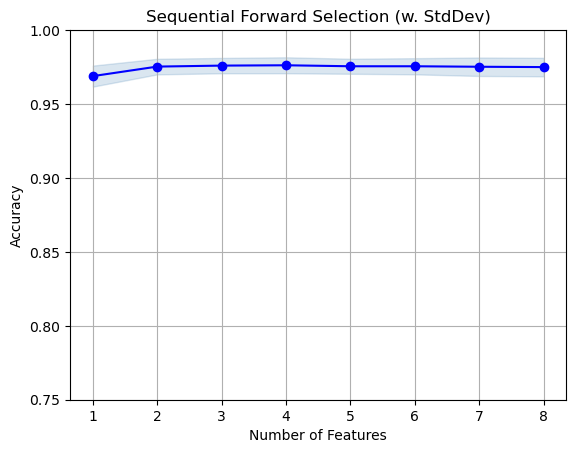

('Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve')


In [183]:
SVM2 = SVC(kernel='rbf')
sfs_forward4 = SFS(SVM2, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward4 = sfs_forward4.fit(X_train[columns_nt], y_train)
sfs_forward4.k_score_
fig1 = plot_sfs(sfs_forward4.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward4.k_feature_names_)

In [184]:
pd.DataFrame.from_dict(sfs_forward4.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9666666666666667, 0.9744444444444444, 0.955...",0.968889,"(Skewness of the integrated profile,)",0.005284,0.007115,0.002372
2,"(1, 3)","[0.9733333333333334, 0.9766666666666667, 0.964...",0.975333,"(Standard deviation of the integrated profile,...",0.00392,0.005277,0.001759
3,"(1, 3, 4)","[0.9744444444444444, 0.9777777777777777, 0.964...",0.976,"(Standard deviation of the integrated profile,...",0.003857,0.005193,0.001731
4,"(1, 2, 3, 4)","[0.9755555555555555, 0.98, 0.9644444444444444,...",0.976222,"(Standard deviation of the integrated profile,...",0.004012,0.005402,0.001801
5,"(0, 1, 2, 3, 4)","[0.9744444444444444, 0.9777777777777777, 0.962...",0.975556,"(Mean of the integrated profile, Standard devi...",0.003782,0.005092,0.001697
6,"(0, 1, 2, 3, 4, 7)","[0.9744444444444444, 0.9777777777777777, 0.961...",0.975556,"(Mean of the integrated profile, Standard devi...",0.00406,0.005466,0.001822
7,"(0, 1, 2, 3, 4, 5, 7)","[0.9744444444444444, 0.9777777777777777, 0.958...",0.975222,"(Mean of the integrated profile, Standard devi...",0.00464,0.006247,0.002082
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9744444444444444, 0.9766666666666667, 0.958...",0.975,"(Mean of the integrated profile, Standard devi...",0.004643,0.006251,0.002084


after compare the avg_score in dataframe, the highest score include 4 features, They are (1,2,3,4).

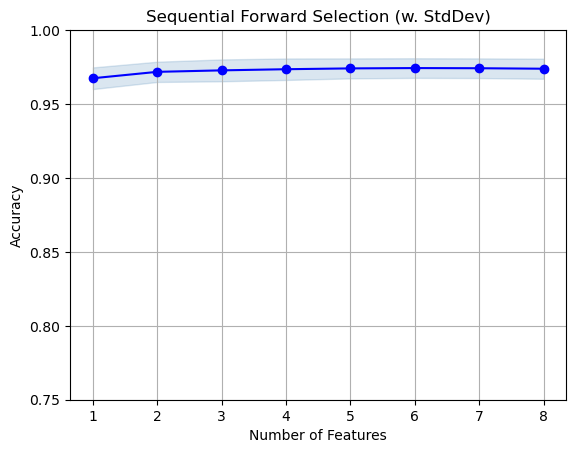

('Mean of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve')


In [185]:
SVM3 = SVC(kernel='poly',degree=1)
sfs_forward5 = SFS(SVM3, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward5 = sfs_forward5.fit(X_train[columns_nt], y_train)
sfs_forward5.k_score_
fig1 = plot_sfs(sfs_forward5.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward5.k_feature_names_)

In [186]:
pd.DataFrame.from_dict(sfs_forward5.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.9655555555555555, 0.9733333333333334, 0.953...",0.967444,"(Skewness of the integrated profile,)",0.005437,0.007321,0.00244
2,"(2, 3)","[0.97, 0.9755555555555555, 0.9566666666666667,...",0.971778,"(Excess kurtosis of the integrated profile, Sk...",0.00509,0.006853,0.002284
3,"(2, 3, 5)","[0.9688888888888889, 0.9755555555555555, 0.955...",0.972778,"(Excess kurtosis of the integrated profile, Sk...",0.00549,0.007391,0.002464
4,"(0, 2, 3, 5)","[0.9722222222222222, 0.9755555555555555, 0.954...",0.973556,"(Mean of the integrated profile, Excess kurtos...",0.005396,0.007266,0.002422
5,"(0, 2, 3, 4, 5)","[0.9733333333333334, 0.9766666666666667, 0.956...",0.974111,"(Mean of the integrated profile, Excess kurtos...",0.00502,0.00676,0.002253
6,"(0, 2, 3, 4, 5, 6)","[0.9744444444444444, 0.9766666666666667, 0.956...",0.974333,"(Mean of the integrated profile, Excess kurtos...",0.00493,0.006638,0.002213
7,"(0, 2, 3, 4, 5, 6, 7)","[0.9733333333333334, 0.9766666666666667, 0.956...",0.974222,"(Mean of the integrated profile, Excess kurtos...",0.004935,0.006644,0.002215
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9733333333333334, 0.9777777777777777, 0.957...",0.973889,"(Mean of the integrated profile, Standard devi...",0.00505,0.0068,0.002267


after compare the avg_score in dataframe, the highest score include 6 features, They are (0,2,3,4,5,6).

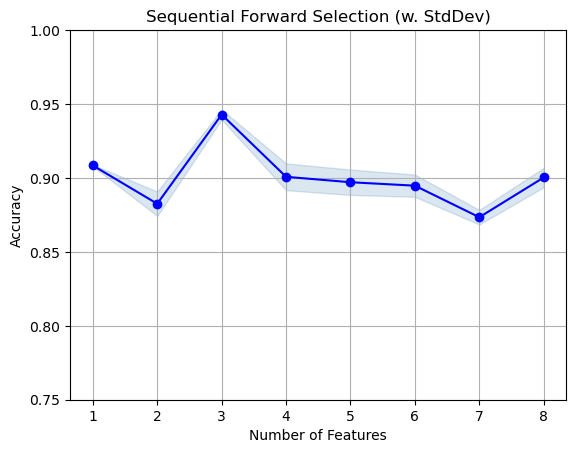

('Standard deviation of the integrated profile', 'Mean of the DM-SNR curve', 'Skewness of the DM-SNR curve')


In [187]:
SVM4 = SVC(kernel='sigmoid')
sfs_forward6 = SFS(SVM4, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=10)
sfs_forward6 = sfs_forward6.fit(X_train[columns_nt], y_train)
sfs_forward6.k_score_
fig1 = plot_sfs(sfs_forward6.get_metric_dict(), ylabel='Accuracy')
plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward6.k_feature_names_)

In [188]:
pd.DataFrame.from_dict(sfs_forward6.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[0.9088888888888889, 0.9088888888888889, 0.908...",0.908444,"(Skewness of the DM-SNR curve,)",0.000404,0.000544,0.000181
2,"(4, 7)","[0.8822222222222222, 0.88, 0.8955555555555555,...",0.882556,"(Mean of the DM-SNR curve, Skewness of the DM-...",0.006143,0.008271,0.002757
3,"(1, 4, 7)","[0.9422222222222222, 0.94, 0.94, 0.95, 0.94444...",0.942889,"(Standard deviation of the integrated profile,...",0.002509,0.003377,0.001126
4,"(1, 3, 4, 7)","[0.9122222222222223, 0.89, 0.8822222222222222,...",0.900778,"(Standard deviation of the integrated profile,...",0.006715,0.009041,0.003014
5,"(1, 3, 4, 6, 7)","[0.9044444444444445, 0.8944444444444445, 0.894...",0.897111,"(Standard deviation of the integrated profile,...",0.006362,0.008566,0.002855
6,"(1, 3, 4, 5, 6, 7)","[0.9088888888888889, 0.8966666666666666, 0.891...",0.894778,"(Standard deviation of the integrated profile,...",0.005585,0.00752,0.002507
7,"(0, 1, 3, 4, 5, 6, 7)","[0.88, 0.8744444444444445, 0.8655555555555555,...",0.873444,"(Mean of the integrated profile, Standard devi...",0.003643,0.004905,0.001635
8,"(0, 1, 2, 3, 4, 5, 6, 7)","[0.9066666666666666, 0.9022222222222223, 0.885...",0.900333,"(Mean of the integrated profile, Standard devi...",0.004897,0.006593,0.002198


after compare the avg_score in dataframe, the highest score include 3 features, They are (1,4,7).

Top 3 features from Task 5:  
`Excess kurtosis of the integrated profile`  
`Skewness of the integrated profile`  
`Mean of the integrated profile`

Top 4 features from Task 6(Wrapper Techniques):----------With Appear Times  
`Skewness of the integrated profile`----------5  
`Standard deviation of the integrated profile`----------5  
`Excess kurtosis of the integrated profile`----------4  
`Mean of the DM-SNR curve`----------4

### Task 7:
Compare the performance of different classifiers using the different feature subsets found in Tasks 5 and 6 and compare it to the results on original dataset that you reported in Task 4. Have the results improved or worsened after feature selection? Is the relative performance of different classifiers and configuration settings in line with your expectation?

In [189]:
column_index

,0
0,Mean of the integrated profile
1,Standard deviation of the integrated profile
2,Excess kurtosis of the integrated profile
3,Skewness of the integrated profile
4,Mean of the DM-SNR curve
5,Standard deviation of the DM-SNR curve
6,Excess kurtosis of the DM-SNR curve
7,Skewness of the DM-SNR curve


Load result from Task 4 to see difference.

In [190]:
results_T4

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Balanced Accuracy
DecisionTree,0.968,0.833333,0.815217,0.824176,0.899349,0.899349
K-NN,0.979,0.938272,0.826087,0.878613,0.910290,0.910290
SVM (Linear),0.977,0.960000,0.782609,0.862275,0.889652,0.889652
SVM (RBF),0.981,0.974026,0.815217,0.887574,0.906507,0.906507
SVM (Poly),0.982,0.962500,0.836957,0.895349,0.916826,0.916826
SVM (Sigmoid),0.900,0.460784,0.510870,0.484536,0.725148,0.725148
"SVM (Poly,degree=2)",0.981,0.974026,0.815217,0.887574,0.906507,0.906507


From Task 5 top features:

In [191]:
Dtree = DecisionTreeClassifier()
Dtree.fit(top3_features_train,y_train)
y_pred_D1 = Dtree.predict(top3_features_test)
accuracy_D1 = accuracy_score(y_test, y_pred_D1)
print(f"Accuracy: {accuracy_D1:.4f}")
precision_D1 = precision_score(y_test, y_pred_D1)
print(f"Precision: {precision_D1:.4f}")
recall_D1 = recall_score(y_test, y_pred_D1)
print(f"Recall: {recall_D1:.4f}")
f1_D1 = f1_score(y_test, y_pred_D1)
print(f"F1-Score: {f1_D1:.4f}")
roc_auc_D1 = roc_auc_score(y_test, y_pred_D1)
print(f'ROC AUC: {roc_auc_D1:.4f}')
bal_accuracy_D1 = balanced_accuracy_score(y_test, y_pred_D1)
print(f"Balanced Accuracy: {bal_accuracy_D1:.3f}")


Accuracy: 0.9630
Precision: 0.7835
Recall: 0.8261
F1-Score: 0.8042
ROC AUC: 0.9015
Balanced Accuracy: 0.901


In [192]:
Knn = KNeighborsClassifier()
Knn.fit(top3_features_train,y_train)
y_pred_K1 = Knn.predict(top3_features_test)
accuracy_K1 = accuracy_score(y_test, y_pred_K1)
print(f"Accuracy: {accuracy_K1:.4f}")
precision_K1 = precision_score(y_test, y_pred_K1)
print(f"Precision: {precision_K1:.4f}")
recall_K1 = recall_score(y_test, y_pred_K1)
print(f"Recall: {recall_K1:.4f}")
f1_K1 = f1_score(y_test, y_pred_K1)
print(f"F1-Score: {f1_K1:.4f}")
roc_auc_K1 = roc_auc_score(y_test, y_pred_K1)
print(f'ROC AUC: {roc_auc_K1:.4f}')
bal_accuracy_K1 = balanced_accuracy_score(y_test, y_pred_K1)
print(f'bal_accuracy: {bal_accuracy_K1:.4f}')

Accuracy: 0.9800
Precision: 0.9286
Recall: 0.8478
F1-Score: 0.8864
ROC AUC: 0.9206
bal_accuracy: 0.9206


In [193]:
svc = SVC(kernel='linear')
svc.fit(top3_features_train, y_train)
y_pred_1l = svc.predict(top3_features_test)
accuracy_1l = accuracy_score(y_test, y_pred_1l)
print(f"Accuracy: {accuracy_1l:.4f}")
precision_1l = precision_score(y_test, y_pred_1l)
print(f"Precision: {precision_1l:.4f}")
recall_1l = recall_score(y_test, y_pred_1l)
print(f"Recall: {recall_1l:.4f}")
f1_1l = f1_score(y_test, y_pred_1l)
print(f"F1-Score: {f1_1l:.4f}")
roc_auc_1l = roc_auc_score(y_test, y_pred_1l)
print(f'ROC AUC: {roc_auc_1l:.4f}')
bal_accuracy_1l = balanced_accuracy_score(y_test, y_pred_1l)
print(f'bal_accuracy: {bal_accuracy_1l:.4f}')

Accuracy: 0.9730
Precision: 0.9710
Recall: 0.7283
F1-Score: 0.8323
ROC AUC: 0.8630
bal_accuracy: 0.8630


In [194]:
svc = SVC(kernel='rbf')
svc.fit(top3_features_train, y_train)
y_pred_1r = svc.predict(top3_features_test)
accuracy_1r = accuracy_score(y_test, y_pred_1r)
print(f"Accuracy: {accuracy_1r:.4f}")
precision_1r = precision_score(y_test, y_pred_1r)
print(f"Precision: {precision_1r:.4f}")
recall_1r = recall_score(y_test, y_pred_1r)
print(f"Recall: {recall_1r:.4f}")
f1_1r = f1_score(y_test, y_pred_1r)
print(f"F1-Score: {f1_1r:.4f}")
roc_auc_1r = roc_auc_score(y_test, y_pred_1r)
print(f'ROC AUC: {roc_auc_1r:.4f}')
bal_accuracy_1r = balanced_accuracy_score(y_test, y_pred_1r)
print(f'bal_accuracy: {bal_accuracy_1r:.4f}')

Accuracy: 0.9740
Precision: 0.9714
Recall: 0.7391
F1-Score: 0.8395
ROC AUC: 0.8685
bal_accuracy: 0.8685


In [195]:
svc = SVC(kernel='poly',degree = 3)
svc.fit(top3_features_train, y_train)
y_pred_1p = svc.predict(top3_features_test)
accuracy_1p = accuracy_score(y_test, y_pred_1p)
print(f"Accuracy: {accuracy_1p:.4f}")
precision_1p = precision_score(y_test, y_pred_1p)
print(f"Precision: {precision_1p:.4f}")
recall_1p = recall_score(y_test, y_pred_1p)
print(f"Recall: {recall_1p:.4f}")
f1_1p = f1_score(y_test, y_pred_1p)
print(f"F1-Score: {f1_1p:.4f}")
roc_auc_1p= roc_auc_score(y_test, y_pred_1p)
print(f'ROC AUC: {roc_auc_1p:.4f}')
bal_accuracy_1p= balanced_accuracy_score(y_test, y_pred_1p)
print(f'bal_accuracy: {bal_accuracy_1p:.4f}')

Accuracy: 0.9730
Precision: 0.9851
Recall: 0.7174
F1-Score: 0.8302
ROC AUC: 0.8581
bal_accuracy: 0.8581


In [196]:
svc = SVC(kernel='sigmoid')
svc.fit(top3_features_train, y_train)
y_pred_1s = svc.predict(top3_features_test)
accuracy_1s = accuracy_score(y_test, y_pred_1s)
print(f"Accuracy: {accuracy_1s:.4f}")
precision_1s = precision_score(y_test, y_pred_1s)
print(f"Precision: {precision_1s:.4f}")
recall_1s = recall_score(y_test, y_pred_1s)
print(f"Recall: {recall_1s:.4f}")
f1_1s = f1_score(y_test, y_pred_1s)
print(f"F1-Score: {f1_1s:.4f}")
roc_auc_1s = roc_auc_score(y_test, y_pred_1s)
print(f'ROC AUC: {roc_auc_1s:.4f}')
bal_accuracy_1s = balanced_accuracy_score(y_test, y_pred_1s)
print(f'bal_accuracy: {bal_accuracy_1s:.4f}')

Accuracy: 0.9380
Precision: 0.6923
Recall: 0.5870
F1-Score: 0.6353
ROC AUC: 0.7803
bal_accuracy: 0.7803


In [197]:
T7_result1 = [accuracy_D1,precision_D1,recall_D1,f1_D1,roc_auc_D1,bal_accuracy_D1]
T7_result2 = [accuracy_K1,precision_K1,recall_K1,f1_K1,roc_auc_K1,bal_accuracy_K1]
T7_result3 = [accuracy_1l,precision_1l,recall_1l,f1_1l,roc_auc_1l,bal_accuracy_1l]
T7_result4 = [accuracy_1r,precision_1r,recall_1r,f1_1r,roc_auc_1r,bal_accuracy_1r]
T7_result5 = [accuracy_1p, precision_1p, recall_1p, f1_1p, roc_auc_1p, bal_accuracy_1p]
T7_result6 = [accuracy_1s, precision_1s, recall_1s, f1_1s, roc_auc_1s, bal_accuracy_1s]
results1 = [T7_result1, T7_result2, T7_result3, T7_result4, T7_result5, T7_result6]
column_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "Balanced Accuracy"]
results1_T7 = pd.DataFrame(results1, columns=column_names)
method_names = ["DecisionTree", "K-NN", "SVM (Linear)", "SVM (RBF)", "SVM (Poly)", "SVM (Sigmoid)"]
results1_T7.index = method_names
results1_T7

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Balanced Accuracy
DecisionTree,0.963,0.783505,0.826087,0.804233,0.901480,0.901480
K-NN,0.980,0.928571,0.847826,0.886364,0.920609,0.920609
SVM (Linear),0.973,0.971014,0.728261,0.832298,0.863029,0.863029
SVM (RBF),0.974,0.971429,0.739130,0.839506,0.868464,0.868464
SVM (Poly),0.973,0.985075,0.717391,0.830189,0.858145,0.858145
SVM (Sigmoid),0.938,0.692308,0.586957,0.635294,0.780262,0.780262


With Top features from Task 6:

In [198]:
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train[['Standard deviation of the integrated profile',
                   'Excess kurtosis of the integrated profile',
                   'Skewness of the integrated profile',
                   'Standard deviation of the DM-SNR curve']],y_train)
y_pred_D2 = Dtree.predict(X_test[['Standard deviation of the integrated profile',
                                  'Excess kurtosis of the integrated profile',
                                  'Skewness of the integrated profile',
                                  'Standard deviation of the DM-SNR curve']])
accuracy_D2 = accuracy_score(y_test, y_pred_D2)
print(f"Accuracy: {accuracy_D2:.4f}")
precision_D2 = precision_score(y_test, y_pred_D2)
print(f"Precision: {precision_D2:.4f}")
recall_D2 = recall_score(y_test, y_pred_D2)
print(f"Recall: {recall_D2:.4f}")
f1_D2 = f1_score(y_test, y_pred_D2)
print(f"F1-Score: {f1_D2:.4f}")
roc_auc_D2 = roc_auc_score(y_test, y_pred_D2)
print(f'ROC AUC: {roc_auc_D:.4f}')
bal_accuracy_D2 = balanced_accuracy_score(y_test, y_pred_D2)
print(f"Balanced Accuracy: {bal_accuracy_D2:.3f}")

Accuracy: 0.9630
Precision: 0.7835
Recall: 0.8261
F1-Score: 0.8042
ROC AUC: 0.8993
Balanced Accuracy: 0.901


In [199]:
Knn = KNeighborsClassifier()
Knn.fit(X_train[['Mean of the integrated profile',
                 'Standard deviation of the integrated profile',
                 'Skewness of the integrated profile']],y_train)
y_pred_K2 = Knn.predict(X_test[['Mean of the integrated profile',
                                'Standard deviation of the integrated profile',
                                'Skewness of the integrated profile']])
accuracy_K2 = accuracy_score(y_test, y_pred_K2)
print(f"Accuracy: {accuracy_K2:.4f}")
precision_K2 = precision_score(y_test, y_pred_K2)
print(f"Precision: {precision_K2:.4f}")
recall_K2 = recall_score(y_test, y_pred_K2)
print(f"Recall: {recall_K2:.4f}")
f1_K2 = f1_score(y_test, y_pred_K2)
print(f"F1-Score: {f1_K2:.4f}")
roc_auc_K2 = roc_auc_score(y_test, y_pred_K2)
print(f'ROC AUC: {roc_auc_K2:.4f}')
bal_accuracy_K2 = balanced_accuracy_score(y_test, y_pred_K2)
print(f'bal_accuracy: {bal_accuracy_K2:.4f}')

Accuracy: 0.9820
Precision: 0.9744
Recall: 0.8261
F1-Score: 0.8941
ROC AUC: 0.9119
bal_accuracy: 0.9119


In [200]:
svc = SVC(kernel='linear')
svc.fit(X_train[columns_nt], y_train)
y_pred_2l = svc.predict(X_test[columns_nt])
accuracy_2l = accuracy_score(y_test, y_pred_2l)
print(f"Accuracy: {accuracy_2l:.4f}")
precision_2l = precision_score(y_test, y_pred_2l)
print(f"Precision: {precision_2l:.4f}")
recall_2l = recall_score(y_test, y_pred_2l)
print(f"Recall: {recall_2l:.4f}")
f1_2l = f1_score(y_test, y_pred_2l)
print(f"F1-Score: {f1_2l:.4f}")
roc_auc_2l = roc_auc_score(y_test, y_pred_2l)
print(f'ROC AUC: {roc_auc_2l:.4f}')
bal_accuracy_2l = balanced_accuracy_score(y_test, y_pred_2l)
print(f'bal_accuracy: {bal_accuracy_2l:.4f}')

Accuracy: 0.9770
Precision: 0.9600
Recall: 0.7826
F1-Score: 0.8623
ROC AUC: 0.8897
bal_accuracy: 0.8897


In [201]:
svc = SVC(kernel='rbf')
svc.fit(X_train[['Standard deviation of the integrated profile',
 'Excess kurtosis of the integrated profile',
 'Skewness of the integrated profile',
 'Mean of the DM-SNR curve']], y_train)
y_pred_2r = svc.predict(X_test[['Standard deviation of the integrated profile',
 'Excess kurtosis of the integrated profile',
 'Skewness of the integrated profile',
 'Mean of the DM-SNR curve']])
accuracy_2r = accuracy_score(y_test, y_pred_2r)
print(f"Accuracy: {accuracy_2r:.4f}")
precision_2r = precision_score(y_test, y_pred_2r)
print(f"Precision: {precision_2r:.4f}")
recall_2r = recall_score(y_test, y_pred_2r)
print(f"Recall: {recall_2r:.4f}")
f1_2r = f1_score(y_test, y_pred_2r)
print(f"F1-Score: {f1_2r:.4f}")
roc_auc_2r = roc_auc_score(y_test, y_pred_2r)
print(f'ROC AUC: {roc_auc_2r:.4f}')
bal_accuracy_2r = balanced_accuracy_score(y_test, y_pred_2r)
print(f'bal_accuracy: {bal_accuracy_2r:.4f}')

Accuracy: 0.9810
Precision: 0.9867
Recall: 0.8043
F1-Score: 0.8862
ROC AUC: 0.9016
bal_accuracy: 0.9016


In [202]:
svc = SVC(kernel='poly',degree = 3)
svc.fit(X_train[['Mean of the integrated profile',
                 'Excess kurtosis of the integrated profile',
                 'Skewness of the integrated profile',
                 'Mean of the DM-SNR curve',
                 'Standard deviation of the DM-SNR curve',
                 'Excess kurtosis of the DM-SNR curve']], y_train)
y_pred_2p = svc.predict(X_test[['Mean of the integrated profile',
                 'Excess kurtosis of the integrated profile',
                 'Skewness of the integrated profile',
                 'Mean of the DM-SNR curve',
                 'Standard deviation of the DM-SNR curve',
                 'Excess kurtosis of the DM-SNR curve']])
accuracy_2p = accuracy_score(y_test, y_pred_2p)
print(f"Accuracy: {accuracy_2p:.4f}")
precision_2p = precision_score(y_test, y_pred_2p)
print(f"Precision: {precision_2p:.4f}")
recall_2p = recall_score(y_test, y_pred_2p)
print(f"Recall: {recall_2p:.4f}")
f1_2p = f1_score(y_test, y_pred_2p)
print(f"F1-Score: {f1_2p:.4f}")
roc_auc_2p= roc_auc_score(y_test, y_pred_2p)
print(f'ROC AUC: {roc_auc_2p:.4f}')
bal_accuracy_2p= balanced_accuracy_score(y_test, y_pred_2p)
print(f'bal_accuracy: {bal_accuracy_2p:.4f}')

Accuracy: 0.9780
Precision: 0.9605
Recall: 0.7935
F1-Score: 0.8690
ROC AUC: 0.8951
bal_accuracy: 0.8951


In [203]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train[['Mean of the integrated profile',
                 'Mean of the DM-SNR curve',
                 'Skewness of the DM-SNR curve']], y_train)
y_pred_2s = svc.predict(X_test[
                ['Mean of the integrated profile',
                 'Mean of the DM-SNR curve',
                 'Skewness of the DM-SNR curve']])
accuracy_2s = accuracy_score(y_test, y_pred_2s)
print(f"Accuracy: {accuracy_2s:.4f}")
precision_2s = precision_score(y_test, y_pred_2s)
print(f"Precision: {precision_2s:.4f}")
recall_2s = recall_score(y_test, y_pred_2s)
print(f"Recall: {recall_2s:.4f}")
f1_2s = f1_score(y_test, y_pred_2s)
print(f"F1-Score: {f1_2s:.4f}")
roc_auc_2s = roc_auc_score(y_test, y_pred_2s)
print(f'ROC AUC: {roc_auc_2s:.4f}')
bal_accuracy_2s = balanced_accuracy_score(y_test, y_pred_2s)
print(f'bal_accuracy: {bal_accuracy_2s:.4f}')

Accuracy: 0.8560
Precision: 0.1977
Recall: 0.1848
F1-Score: 0.1910
ROC AUC: 0.5544
bal_accuracy: 0.5544


In [204]:
T7_result7 = [accuracy_D2,precision_D2,recall_D2,f1_D2,roc_auc_D2,bal_accuracy_D2]
T7_result8 = [accuracy_K2,precision_K2,recall_K2,f1_K2,roc_auc_K2,bal_accuracy_K2]
T7_result9 = [accuracy_2l,precision_2l,recall_2l,f1_2l,roc_auc_2l,bal_accuracy_2l]
T7_result10 = [accuracy_2r,precision_2r,recall_2r,f1_2r,roc_auc_2r,bal_accuracy_2r]
T7_result11 = [accuracy_2p, precision_2p, recall_2p, f1_2p, roc_auc_2p, bal_accuracy_2p]
T7_result12 = [accuracy_2s, precision_2s, recall_2s, f1_2s, roc_auc_2s, bal_accuracy_2s]
results2 = [T7_result7, T7_result8, T7_result9, T7_result10, T7_result11, T7_result12]
column_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "Balanced Accuracy"]
results2_T7 = pd.DataFrame(results2, columns=column_names)
method_names = ["DecisionTree", "K-NN", "SVM (Linear)", "SVM (RBF)", "SVM (Poly)", "SVM (Sigmoid)"]
results2_T7.index = method_names
results2_T7

,Accuracy,Precision,Recall,F1-Score,ROC AUC,Balanced Accuracy
DecisionTree,0.963,0.783505,0.826087,0.804233,0.901480,0.901480
K-NN,0.982,0.974359,0.826087,0.894118,0.911942,0.911942
SVM (Linear),0.977,0.960000,0.782609,0.862275,0.889652,0.889652
SVM (RBF),0.981,0.986667,0.804348,0.886228,0.901623,0.901623
SVM (Poly),0.978,0.960526,0.793478,0.869048,0.895087,0.895087
SVM (Sigmoid),0.856,0.197674,0.184783,0.191011,0.554396,0.554396


After Comparision from 3 tables, I find that top3 features and features select by last task will not help improve the classifier performance. And also they are a little bit lower than original accuracy. 

## Task 8:
Plot the ROC curves for the "1" class and the different classification models. What do you learn from this ROC curve? Which classifier/configuration is best suited for this task? Are you satisfied with the performance?

In [209]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train[columns_nt], y_train)
print(f"Accuracy of the dummy classifier: " f"{dummy_classifier.score(X_test[columns_nt], y_test):.3f}")

Accuracy of the dummy classifier: 0.908


Text(0.5, 1.0, 'ROC AUC curve')

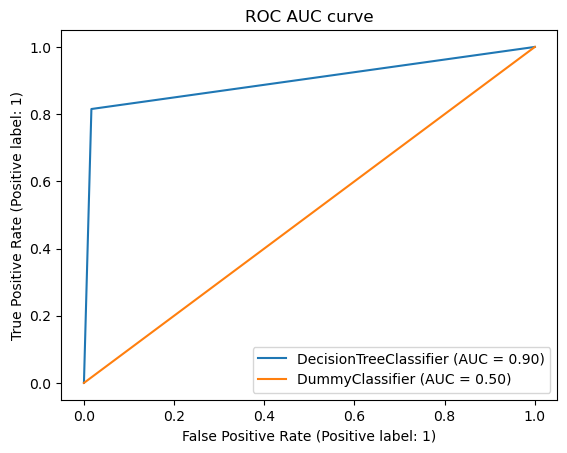

In [210]:
from sklearn.metrics import RocCurveDisplay
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier1, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

Text(0.5, 1.0, 'ROC AUC curve')

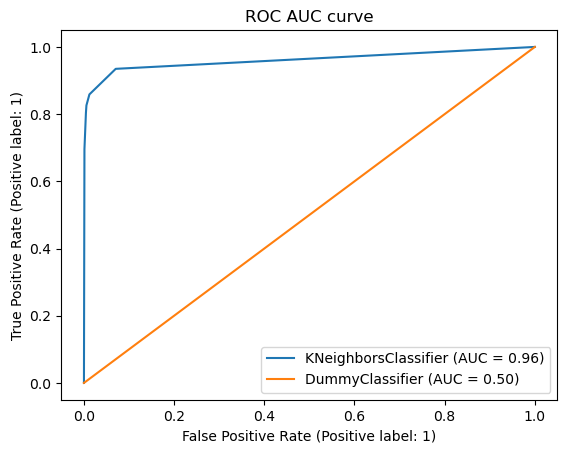

In [211]:
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier2, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

Text(0.5, 1.0, 'ROC AUC curve')

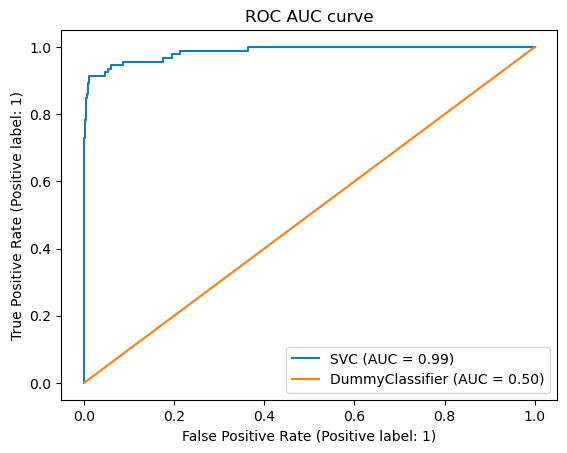

In [212]:
classifier3 = SVC(kernel='linear')
classifier3.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier3, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

Text(0.5, 1.0, 'ROC AUC curve')

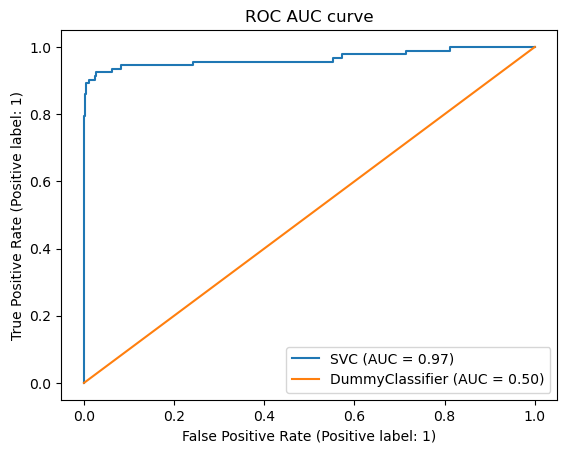

In [213]:
classifier4 = SVC(kernel='rbf')
classifier4.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier4, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

Text(0.5, 1.0, 'ROC AUC curve')

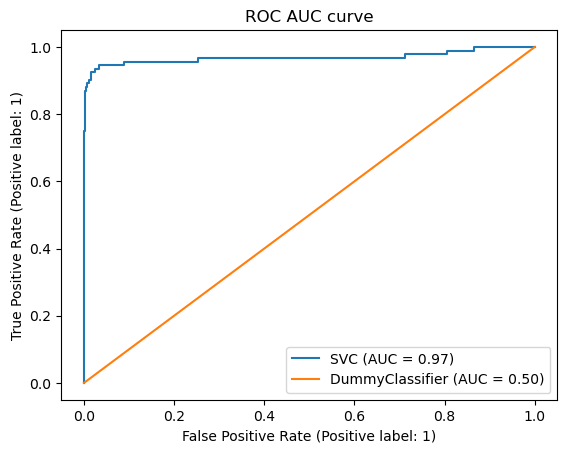

In [214]:
classifier5 = SVC(kernel='poly')
classifier5.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier5, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

Text(0.5, 1.0, 'ROC AUC curve')

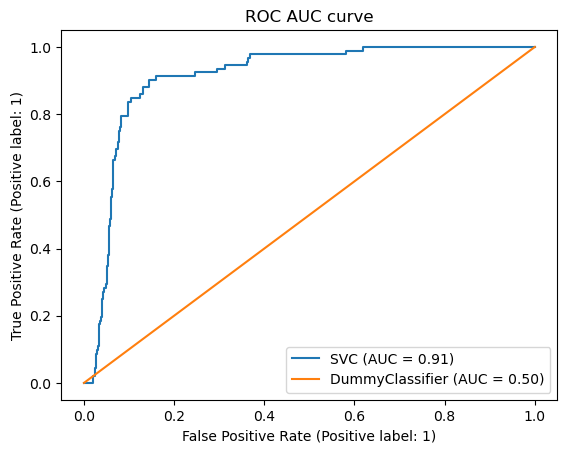

In [215]:
classifier6 = SVC(kernel='sigmoid')
classifier6.fit(X_train[columns_nt], y_train)
disp = RocCurveDisplay.from_estimator(classifier6, X_test[columns_nt], y_test, pos_label=1)
disp = RocCurveDisplay.from_estimator(dummy_classifier, X_test[columns_nt], y_test, pos_label=1, ax = disp.ax_)
disp.ax_.set_title("ROC AUC curve")

I use 6 different classifiers and compare to dummy classifier (AUC = 0.5) which are performance well except the decisionTree clkassifier and SVM ('sigmoid'). It lower than i expect for decision tree.

## Task 9:
Bonus questions

(i) correlation of the various features with the target class  
Calculate correlation to identify features that strongly correlate with the target class.
We can create correlation matrices or plots to visualize the strength and direction of correlations between features and the target class.

we can always use it to do a comparision in different dataset, It will related to select the feature which are more important than other features and help us improve performance.

(ii) Feature Selection and Importance:  
Implement feature selection techniques: Utilize feature selection methods such as SFS.  
Consider techniques like Principal Component Analysis (PCA) to reduce dimensionality while preserving the most valuable information.

(iii) Relative Performance of Different Classifiers and Parameter Settings:  
We can experiment with different classifiers (Decision Trees, k-NN, SVM with various kernels) to determine which one performs best. And we can set different parameter settings like random_state and degree in 'poly' etc. for compare each classifier accuracy. Besides accuracy, consider other metrics like precision, recall, F1-score, and ROC AUC to gain a more comprehensive understanding of each classifier's performance.

(iv) effect of different ways of imputing missing values on the final performance of different classifiers:    
We can use simpleimputer with mean,most-frequent,median etc to impute the missing values. Also we can use K-nn imputation.  
Assess how different imputation methods affect the performance of various classifiers by using some plots to compare original dataset.  
Depending on the dataset's background, some imputation methods may be more suitable than others. We should consider the dataset then decide which methods will use in this task.
